In [ ]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.patches as mpatches

# Preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_validate, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Metrics
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    accuracy_score as accuracy,
    precision_score as precision,
    recall_score as recall,
    f1_score as f1,
    roc_auc_score,
    mean_squared_error,
    mean_absolute_error as mae,
    root_mean_squared_error as rmse,
    r2_score,
    make_scorer
)

# Models
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import xgboost as xgb

# Hyperparameter tuning
from scipy.stats import randint, uniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# Oversampling
from imblearn.over_sampling import SMOTE

# Google Colab
from google.colab import drive

# Import Data

For Google Drive:

In [ ]:
drive.mount('/content/drive')


In [ ]:
# Pfad zur CSV-Datei
file_path = '/content/drive/My Drive/final_df.csv'

# Datei laden
flights = pd.read_csv(file_path)

flights

DEPARTURE_DELAY  TAXI_OUT  SCHEDULED_TIME  ELAPSED_TIME  AIR_TIME  \
0                   0.0       0.0           150.0           0.0       0.0   
1                  -1.0      31.0           128.0         137.0      97.0   
2                  -4.0      16.0           136.0         147.0     121.0   
3                  12.0      22.0           335.0         332.0     300.0   
4                  -5.0      32.0           130.0         169.0      98.0   
...                 ...       ...             ...           ...       ...   
460385              3.0      14.0           265.0         241.0     223.0   
460386              0.0      15.0            96.0          77.0      57.0   
460387             -1.0      17.0           252.0         241.0     217.0   
460388             -4.0      18.0           279.0         284.0     225.0   
460389             -6.0      13.0           222.0         202.0     184.0   

        DISTANCE  TAXI_IN  ARRIVAL_DELAY  DIVERTED  CANCELLED  ...  \
0            731      0.0            0.0         0          1  ...   
1            762      9.0            8.0         0          0  ...   
2            689     10.0            7.0         0          0  ...   
3           2139     10.0            9.0         0          0  ...   
4            762     39.0           34.0         0          0  ...   
...          ...      ...            ...       ...        ...  ...   
460385      2139      4.0          -21.0         0          0  ...   
460386       414      5.0          -19.0         0          0  ...   
460387      1846      7.0          -12.0         0          0  ...   
460388      2139     41.0            1.0         0          0  ...   
460389      1635      5.0          -26.0         0          0  ...   

        Destination_AIRPORT_LaGuardia Airport (Marine Air Terminal)  \
0                                                   False             
1                                                    True             
2                                                   False             
3                                                   False             
4                                                    True             
...                                                   ...             
460385                                              False             
460386                                              False             
460387                                              False             
460388                                              False             
460389                                              False             

        Destination_AIRPORT_Los Angeles International Airport  \
0                                                   False       
1                                                   False       
2                                                   False       
3                                                   False       
4                                                   False       
...                                                   ...       
460385                                              False       
460386                                              False       
460387                                              False       
460388                                              False       
460389                                              False       

        Destination_AIRPORT_McCarran International Airport  \
0                                                   False    
1                                                   False    
2                                                   False    
3                                                   False    
4                                                   False    
...                                                   ...    
460385                                              False    
460386                                               True    
460387                                            

From local folder:

In [7]:
file_path = "/Users/elocher/Business/Project/data/"

flights = pd.read_csv(file_path + "final_df.csv")

# 0. Data Inspection

In [3]:
ls = []
for i in flights.columns:
  ls.append(i)

In [4]:
ls

['DEPARTURE_DELAY',
 'TAXI_OUT',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'TAXI_IN',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY',
 'SCHEDULED_DEPARTURE_DATETIME',
 'DEPARTURE_TIME_DATETIME',
 'ARRIVAL_TIME_DATETIME',
 'SCHEDULED_ARRIVAL_DATETIME',
 'departure_6hr_before',
 'departure_1hr_before',
 'departure_1hr_after',
 'departure_6hr_after',
 'arrival_6hr_before',
 'arrival_1hr_before',
 'arrival_1hr_after',
 'arrival_6hr_after',
 'SCHEDULED_DEPARTURE_DATETIME_tmpc',
 'SCHEDULED_DEPARTURE_DATETIME_sped',
 'SCHEDULED_DEPARTURE_DATETIME_p01m',
 'SCHEDULED_DEPARTURE_DATETIME_vsby',
 'departure_6hr_before_tmpc',
 'departure_6hr_before_sped',
 'departure_6hr_before_p01m',
 'departure_6hr_before_vsby',
 'departure_1hr_before_tmpc',
 'departure_1hr_before_sped',
 'departure_1hr_before_p01m',
 'departure_1hr_before_vsby',
 'departure_1hr_after_tmpc',
 'departure_1hr_after

In [6]:
for el in ls:
  print(flights[el])

0          0.0
1         -1.0
2         -4.0
3         12.0
4         -5.0
          ... 
460385     3.0
460386     0.0
460387    -1.0
460388    -4.0
460389    -6.0
Name: DEPARTURE_DELAY, Length: 460390, dtype: float64
0          0.0
1         31.0
2         16.0
3         22.0
4         32.0
          ... 
460385    14.0
460386    15.0
460387    17.0
460388    18.0
460389    13.0
Name: TAXI_OUT, Length: 460390, dtype: float64
0         150.0
1         128.0
2         136.0
3         335.0
4         130.0
          ...  
460385    265.0
460386     96.0
460387    252.0
460388    279.0
460389    222.0
Name: SCHEDULED_TIME, Length: 460390, dtype: float64
0           0.0
1         137.0
2         147.0
3         332.0
4         169.0
          ...  
460385    241.0
460386     77.0
460387    241.0
460388    284.0
460389    202.0
Name: ELAPSED_TIME, Length: 460390, dtype: float64
0           0.0
1          97.0
2         121.0
3         300.0
4          98.0
          ...  
460385    223.0
4

# 1. Feature Auswahl

**Herauszunehmende Features:**

Grundsätzlich müssen wir v.a. diejenigen Features herausnehmen, die eng verbunden sind mit dem Label (bsp. Summe oder Subtraktion von Features ergibt Weather Delay). Ausserdem können wir die Datetime Spalten so nicht direkt verwenden. Wir könnten Dummy-Variablen vom Tag, Monat oder der Stunde erstellen. Wir haben uns aber entschieden, dies nicht zu tun. Unten sind noch einige Informationen über die verschiedenen Features in Stichpunkten erläutert:

- Departure Delay und Arrival Delay herausnehmen (da Summe Delayarten = WeatherDelay)
- Diverted und Cancelled (bei Regression herausnehmen oder bei Classification: bei Diverted oder Cancelles bei Arrivel_Time_Datetime die Scheduled_Arrival_time hineingetan -> entweder die Arrival Time herausnehmen
- Departure_Delay, Arrival_Delay, Elapsed_time, Air_time, Taxi_in, Taxi_out = 0, wenn Diverted oder Cancelled)
- Bei Departure_time und Arrival_time wurden Scheduled_Arrival_time und Scheduled_Departure_time hineingetan, falls Diverted oder Cancelled

- Sheduled_Time ist in Minuten -> zeigt Differenz zwischen Scheduled_Departure_time und Scheduled_Arrival_time -> unter Berücksichtigung der Zeitdifferenz
- Elapsed_time = dasselbe für die Arrival_time und Departure_time, also nicht scheduled.
- Taxi_in + Taxi_out + Flight-time = Elapsed_time

**In Dataset drinnlassen:**
- Airline-Boolean drinnlassen
- Airport-Boolean drinnlassen
- Alle Weather_data
- Flight-average weather delay -> drinnlassen -> groupby Flight_number und column WeatherDelay mean.
- Weather beider airports -> Origin und DESTINATION_AIRPORT
- Weekend Boolean drinnlassen

**Wetterdaten Metrik:**
- sped = Windspeed mph
- p01m = Presipitation in mm
- tempc = airtemp in celsius
- visibility in miles

In [8]:
columns_to_drop = ['DEPARTURE_DELAY',
                    'TAXI_OUT',
                    'SCHEDULED_TIME',
                    'ELAPSED_TIME',
                    'AIR_TIME',
                    'TAXI_IN',
                    'ARRIVAL_DELAY',
                    'SECURITY_DELAY',
                    'LATE_AIRCRAFT_DELAY',
                    'SCHEDULED_DEPARTURE_DATETIME',
                    'DEPARTURE_TIME_DATETIME',
                    'ARRIVAL_TIME_DATETIME',
                    'SCHEDULED_ARRIVAL_DATETIME',
                    'departure_6hr_before',
                    'departure_1hr_before',
                    'departure_1hr_after',
                    'departure_6hr_after',
                    'arrival_6hr_before',
                    'arrival_1hr_before',
                    'arrival_1hr_after',
                    'arrival_6hr_after',
                    'CANCELLATION_DESCRIPTION_National Air System',
                    'CANCELLATION_DESCRIPTION_Not cancelled',
                    'CANCELLATION_DESCRIPTION_Weather',
                    'DIVERTED',
                    'CANCELLED',
                    'AIR_SYSTEM_DELAY',
                    'AIRLINE_DELAY']

flights = flights.drop(columns=columns_to_drop)

In [10]:
pd.DataFrame(flights['WEATHER_DELAY'] > 0).value_counts()

WEATHER_DELAY
False            453636
True               6754
Name: count, dtype: int64

Bei einer binären Klassifizierung von WEATHER_DELAY haben wir es mit einem großen Ungleichgewicht zwischen den beiden Klassen zu tun (453k vs. 6.7k). Wir können eine einfache logistische Regression oder XGBClassification versuchen, um zu sehen, ob wir eine gute Leistung erzielen oder nicht. Wir wählen zweiteres Modell vor dem RandomForest, da wir vor allem aus Assignment 2 und 3 sowie aus "Fundamentals and Methods of CS" wissen, dass das Hyperparameter-Tuning bei einem XGBClassifier Modell besser funktioniert.

## 1.1 Feature vs. Label und Feature vs. Feature Analyse

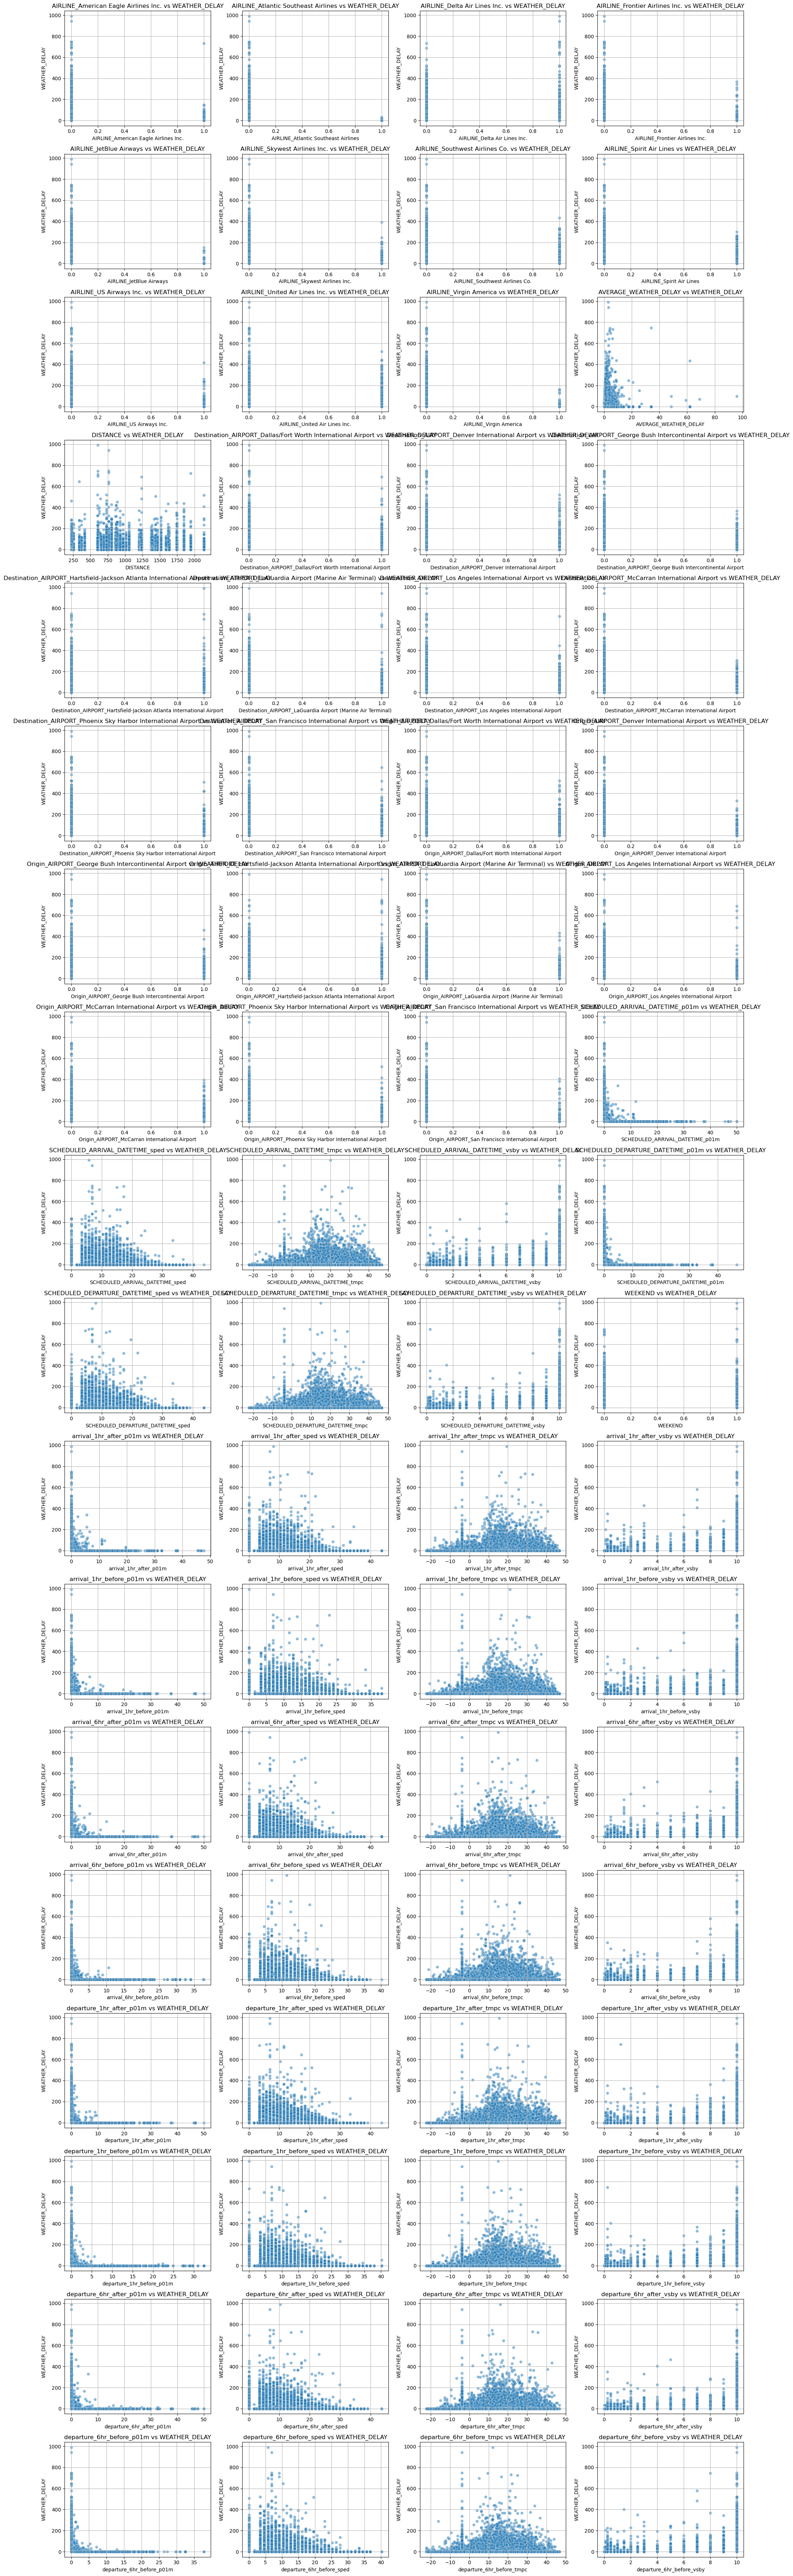

In [ ]:
# Alle Spalten außer WEATHER_DELAY identifizieren
features = flights.columns.difference(['WEATHER_DELAY'])

# Subplots für mehrere Plots
num_features = len(features)
cols = 4  # Anzahl der Spalten in der Grid-Darstellung
rows = (num_features + cols - 1) // cols  # Automatische Berechnung der Zeilen

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))
axes = axes.flatten()  # Um leichter iterieren zu können

for i, feature in enumerate(features):
    sns.scatterplot(data=flights, x=feature, y='WEATHER_DELAY', ax=axes[i], alpha=0.5)
    axes[i].set_title(f"{feature} vs WEATHER_DELAY")
    axes[i].grid()

# Überschüssige Subplots deaktivieren
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


**Einige Punkte zu obigen Korrelationsplots:**

1. Wir sehen, dass wir einige kategoriale Features haben. Manche sind bereits als Boolean formatiert (z.B. die verschiedenen Ablugs- und Ankunftsflughafen). Bei anderen stellt sich die Frage, ob es nicht mehr Sinn machen würde, sie als boolean zu formatieren. Dazu zählt das Feature `visibility (vsby)`, welches jeweils am Ankunfts- und Abflugsflughafen zur Abflugs-/Ankunftszeit, 1h vor- und danach sowie 6h vor- und danach gezeigt wird (dies wurde bei allen Wetterdaten so gemacht). Wir sehen hierbei, dass eine schlechtere `visibility` den `Weather_Delay` tendenziell steigen lässt (höherer Wert bei visibility führt zu höherer wetterbedingten Verspätung). Deswegen macht es Sinn, dieses Feature als numerischen Wert im Dataset zu lassen, damit diese Information nicht verloren geht.
2. Beim Feature `Percipitation (p01m)`, Niederschlag, ist zu erkennen, dass mehr Niederschlag nicht zu mehr Verspätung führt, sondern tendenziell bei einer höheren Niederschlagsmenge in mm keine Verspätungen zu sehen sind. Hingegen sehen wir bei extrem viele wetterbedingte Verspätungen, wenn es 0 mm oder nur ganz wenig Niederschlag gibt. Dies entspricht nicht unbedingt unseren Erwartungen, da wir dachten, dass mehr Niederschlag den Flugverkehr behindern könnte. Besonders wenn der Niederschlag mit tiefen Minustemperaturen verbunden ist (also Schneefall).
3. Bei der `Windgeschwindigkeit (sped)` in mph sehen wir, dass es doch einige Flüge gibt, die Verspätungen aufzeigen, wenn der Wind blässt. Dennoch ist auch hier zu sehen, dass dieses Feature alleine nicht sehr gut die wetterbedingten Verspätungen erklären kann (bsp. gibt es viele Flüge mit wetterbedingten Verspätungen trotz 0 mph Wind)
4. Beim Feature `Temperatur (tmpc)` in Grad Celsius gibt es keinen erkennbaren linearen Zusammenhang zwischen der Temperatur und den wetterbedingten Verspätungen. Die Datenpunkte sind stark gestreut, was auf eine geringe bis gar keine lineare Korrelation hinweist. Auch hier zeigt ein grossteil der Flüge keine wetterbedingte Verspätung (y=0). Dies deutet darauf hin, dass wetterbedingte Verspätungen nicht ausschließlich von der Temperatur abhängen.
5. `Durchschnittliche Verspätung pro Flugnummer (Average_Weather_Delay)`: Die meisten Flüge haben sehr niedrige Werte für die durchschnittliche wetterbedingte Verspätung pro Flugnummer (< 10) und die tatsächliche wetterbedingte Verspätung des einzelnen Flugs (y ≈ 0). Dies deutet darauf hin, dass wetterbedingte Verspätungen in der Regel selten auftreten und oft nur in geringer Höhe. Es gibt zudem eine dichte Clusterbildung im Bereich x < 10 und y < 200, was zeigt, dass Flüge mit niedrigen durchschnittlichen wetterbedingten Verspätungen meist ebenfalls niedrige Verspätungen für den einzelnen Flug aufweisen. Für Flüge mit durchschnittlichen wetterbedingten Verspätungen > 20  ist die Streuung der tatsächlichen wetterbedingten Verspätungen grösser (bis zu 1000 Minuten). Dies könnte darauf hinweisen, dass eine höhere durchschnittliche Verspätung pro Flugnummer auch das Risiko für grosse Verspätungen bei einzelnen Flügen erhöht.

**Fazit:**
Ein Grossteil der Flüge weist keine wetterbedingten Verspätungen auf. Selbst wenn wetterbezogene Faktoren wie Sicht, Wind oder Temperatur in ungünstigen Bereichen liegen, bleibt der Anteil der betroffenen Flüge gering. Viele der analysierten Wettermerkmale (z. B. Niederschlag, Wind, Temperatur) weisen nur schwache oder keine lineare Korrelation mit wetterbedingten Verspätungen auf. Dies deutet darauf hin, dass wetterbedingte Verspätungen durch eine Kombination mehrerer Faktoren entstehen. Das liefert Hinweise darauf, dass wir evt. mit nicht-linearen Modellen bessere Ergebnisse erzielen könnten.

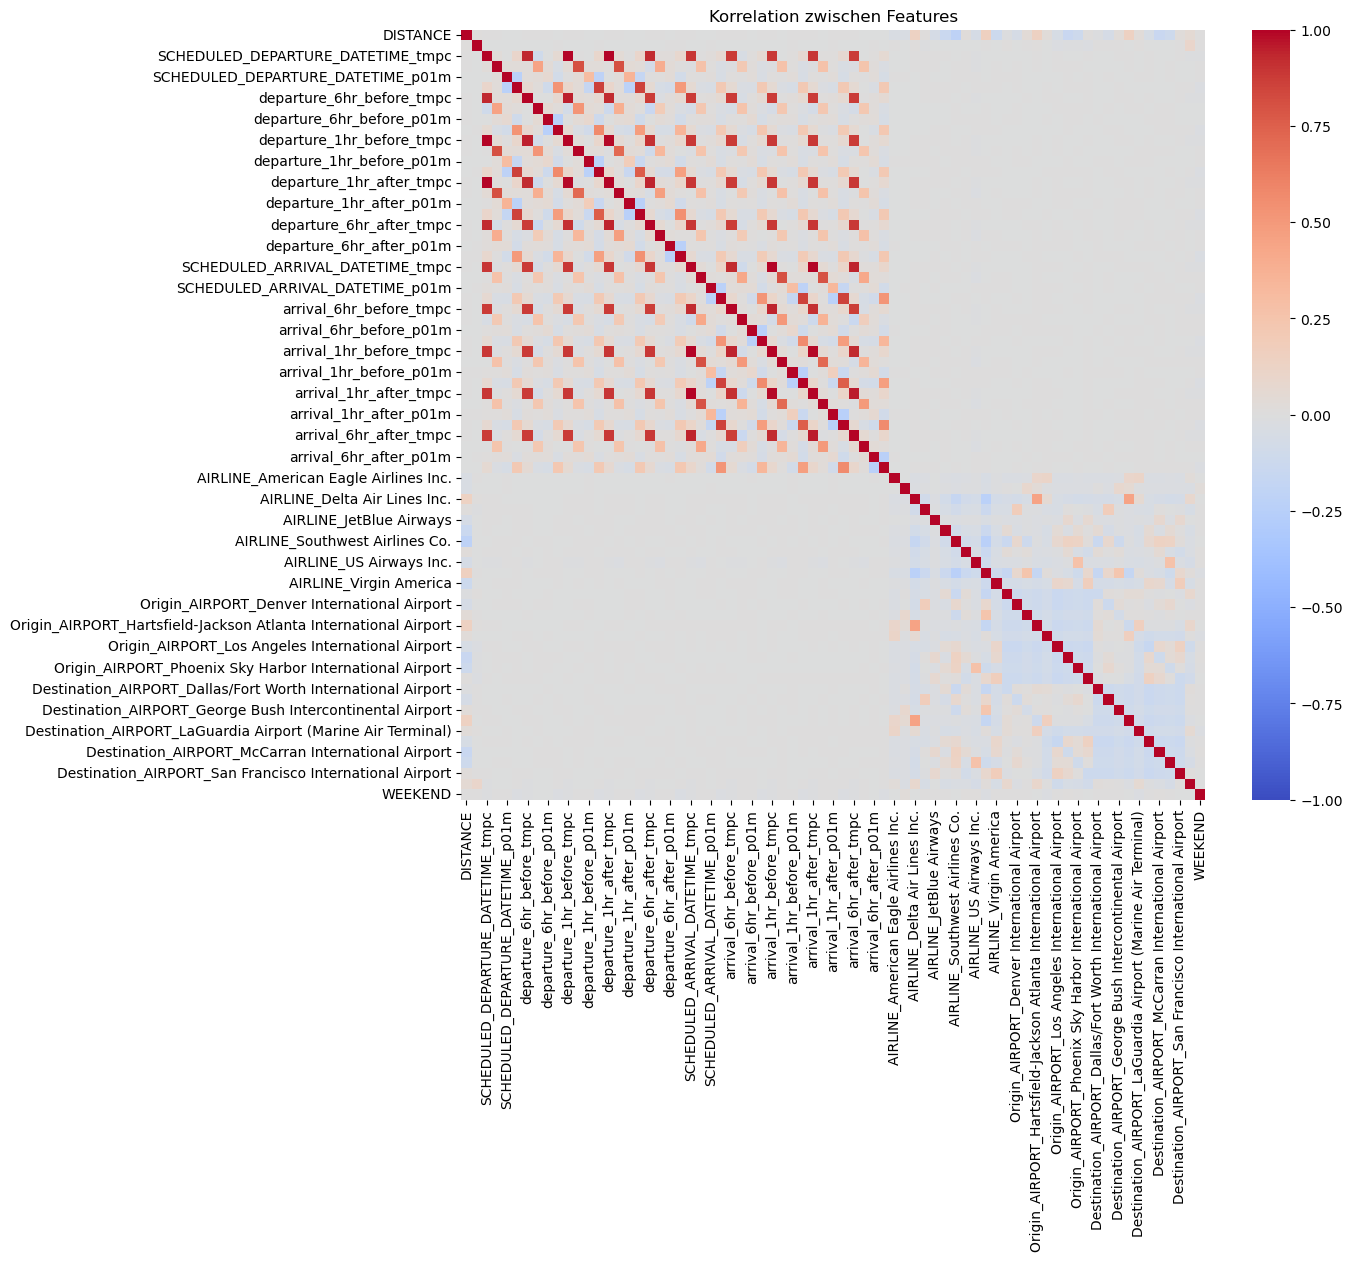

In [ ]:
# Korrelationsmatrix berechnen
correlation_matrix = flights.corr()

# Heatmap der Korrelationsmatrix erstellen
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korrelation zwischen Features")
plt.show()


**Multikollinearität:**

Wir sehen zuerst einmal, dass unsere Timelags bei den Wetterdaten z.T. sehr stark miteinander korrellieren. Dies kann zu Multikollinearität führen. Multikollinearität tritt auf, wenn zwei oder mehr Features in einem Datensatz hoch miteinander korreliert sind. Das bedeutet, dass sie eine sehr ähnliche Information liefern, was die Fähigkeit eines Modells, den Einfluss einzelner Features richtig zu schätzen, beeinträchtigen kann.

Bei Modellen wie der **logistischen Regression** oder **linearen Regression** kann Multikollinearität zu Problemen führen, weil sie die Koeffizienteninstabilität verursacht. Dies bedeutet, dass es schwierig wird, den individuellen Einfluss der korrelierten Features auf das Label korrekt zu bewerten. Die Schätzwerte der Regressionskoeffizienten können verzerrt oder hochgradig variabel sein.

**Random Forest** und andere **baum-basierte Modelle** sind weniger anfällig für Probleme der Multikollinearität, da diese Modelle nichtlinear und hierarchisch arbeiten. Die Bäume lernen, die wichtigsten Merkmale zu trennen und zu kombinieren, ohne dass sie durch starke Korrelationen zwischen Features stark beeinträchtigt werden.
Das bedeutet, dass man sich bei der Verwendung von Modellen wie Random Forest oder Gradient Boosting in der Regel weniger Sorge um Multikollinearität machen muss. Diese Modelle können weiterhin nützliche Muster erkennen, auch wenn einige Features stark miteinander korrelieren.

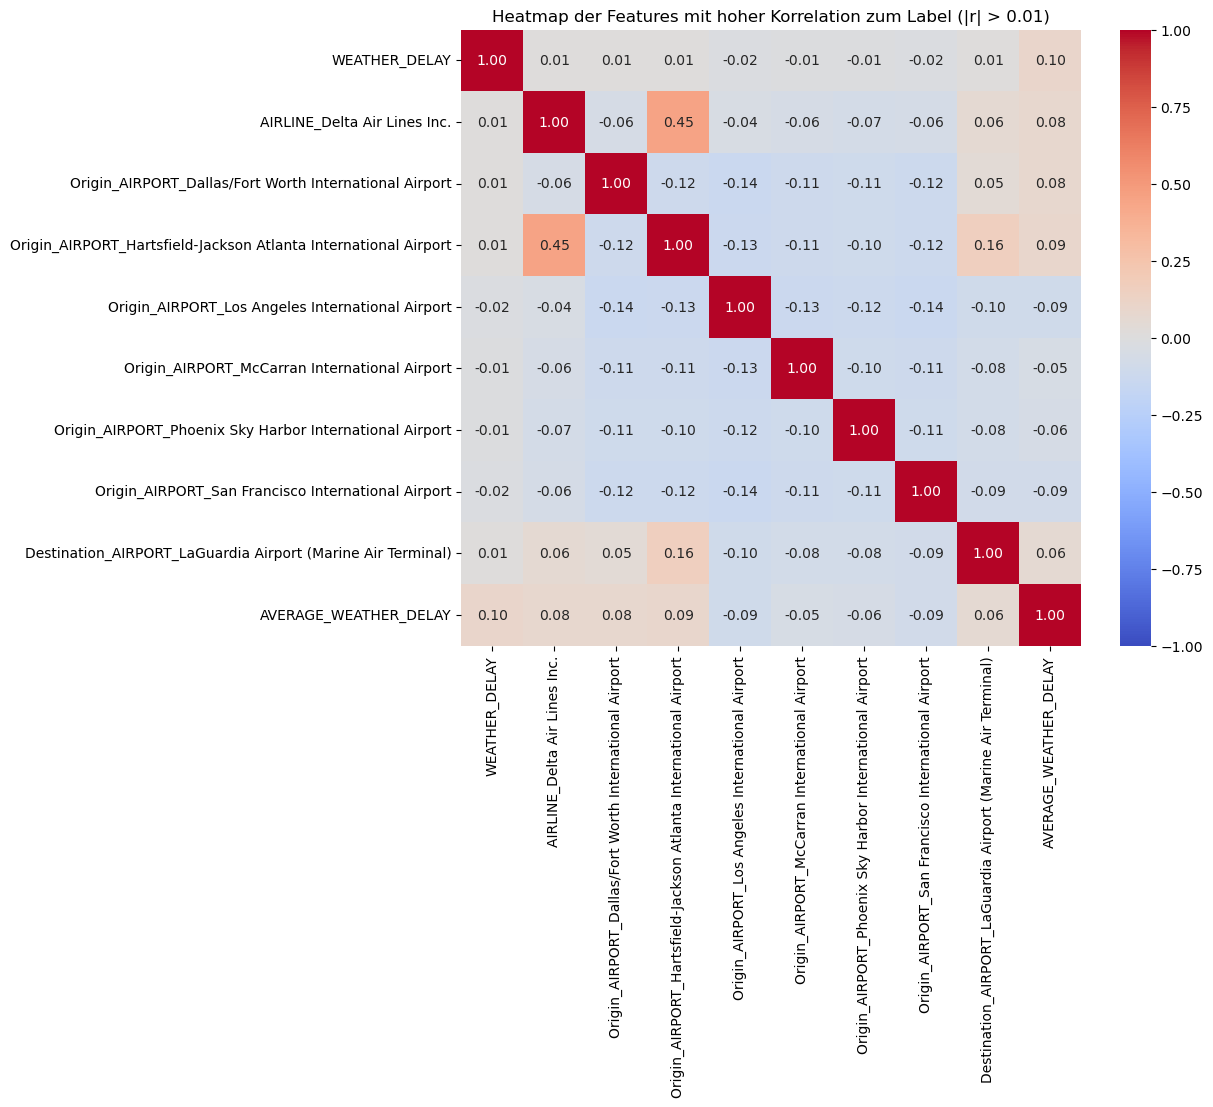

In [39]:
# Nur Features mit signifikanter Korrelation zum Label (z. B. |Korrelation| > 0.01)
threshold = 0.01
correlation_matrix = flights.corr()

# Filter für hohe Korrelation mit WEATHER_DELAY
high_corr_features = correlation_matrix.loc[
    correlation_matrix['WEATHER_DELAY'].abs() > threshold, 
    correlation_matrix['WEATHER_DELAY'].abs() > threshold
]

# Heatmap mit reduzierter Anzahl von Features
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr_features, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Heatmap der Features mit hoher Korrelation zum Label (|r| > 0.01)")
plt.show()


**Interpretation der höchsten Feature-Label Korrelation:**

Ein sehr geringer Korrelationskoeffizient (nahe null) zwischen den meisten Features und dem Ziel (Label). Dies deutet darauf hin, dass viele dieser Features wenig bis gar keinen Einfluss auf das Label haben. Diese irrelevanten Features könnten das Modell unnötig komplex machen und die Rechenleistung erhöhen, ohne eine bessere Leistung zu liefern.

Für unsere Modelle bedeutet dies:
+ Der **Random Forest** benötigt keine explizite Feature-Auswahl, da er während des Trainings selbst entscheidet, welche Features am nützlichsten sind. Features mit einer geringen Korrelation zu WEATHER_DELAY werden weniger wichtig sein und könnten in den Entscheidungsbäumen weniger häufig ausgewählt werden.
Trotzdem könnte es hilfreich sein, die Feature-Auswahl zu optimieren, um die Rechenkosten zu reduzieren und das Modell effizienter zu machen.
+ Bei der **logistischen/linearen Regression** sind Features mit sehr geringer Korrelation zu WEATHER_DELAY möglicherweise nicht signifikant und könnten zu einer schlechteren Modellleistung führen, wenn sie im Modell verbleiben. Wir werden hier versuchen, irrelevante Features zu entfernen oder eine L1-Regularisierung (Lasso) zu verwenden, die automatisch weniger wichtige Features eliminiert.

## 1.2 Label Analyse

In [11]:
flights['WEATHER_DELAY'].value_counts()

WEATHER_DELAY
0.0      453636
6.0         179
7.0         177
10.0        176
8.0         174
          ...  
278.0         1
209.0         1
225.0         1
222.0         1
310.0         1
Name: count, Length: 335, dtype: int64

Bereits hier sehen wir, dass wir in über 450k der Flüge kein Weather Delay haben. Eine Häufigkeitsverteilung des gesamten Labels macht also nicht viel Sinn (vgl. Plot unten).

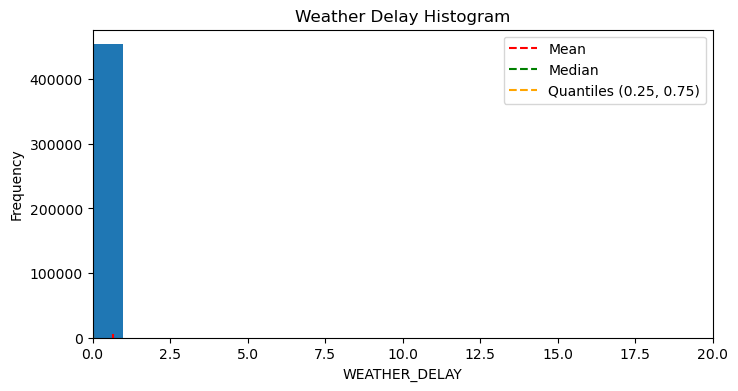

count    460390.000000
mean          0.645377
std           9.313301
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         991.000000
Name: WEATHER_DELAY, dtype: float64

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))

# Draw the histogram
ax.hist(flights["WEATHER_DELAY"], bins=1000)

# Draw the mean and median lines
ymax = 5000  # Maximum of the y-axis
ax.vlines([flights["WEATHER_DELAY"].mean()], ymin=0, ymax=ymax, linestyles="dashed", 
          colors=["red"], label="Mean")
ax.vlines([flights["WEATHER_DELAY"].median()], ymin=0, ymax=ymax, linestyles="dashed",
            colors=["green"], label="Median")

# Draw 0.25, 0.75 quantiles
ax.vlines([flights["WEATHER_DELAY"].quantile(0.25), flights["WEATHER_DELAY"].quantile(0.75)], ymin=0, ymax=ymax,
            linestyles="dashed", colors=["orange", "orange"], label="Quantiles (0.25, 0.75)")

# Set the x-axis limit
ax.set_xlim(0, 20)  # Limit the x-axis from 0 to 100

# Add the legend
ax.legend()

# Set labels and title
ax.set_xlabel("WEATHER_DELAY")
ax.set_ylabel("Frequency")
ax.set_title("Weather Delay Histogram")

# Show the plot
plt.show()

# Display descriptive statistics of WEATHER_DELAY
flights["WEATHER_DELAY"].describe()


Deswegen plotten wir nun eine Verteilung aller wetterbedingten Flugverspätungen (dh. WEATHER_DELAY > 0).

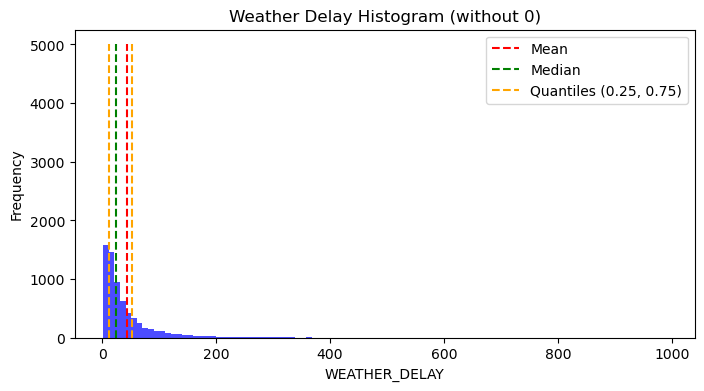

count    6754.000000
mean       43.992449
std        63.294154
min         1.000000
25%        11.000000
50%        24.000000
75%        52.000000
max       991.000000
Name: WEATHER_DELAY, dtype: float64

In [ ]:
# Filtere nur die Werte größer als 0 für die Anzeige
weather_delay_nonzero = flights[flights["WEATHER_DELAY"] > 0]["WEATHER_DELAY"]

fig, ax = plt.subplots(figsize=(8, 4))

# Zeichne das Histogramm nur für Werte > 0
ax.hist(weather_delay_nonzero, bins=100, color='blue', alpha=0.7)

# Berechne den maximalen Wert der Y-Achse
ymax = 5000  # Du kannst das ymax weiter anpassen

# Zeichne die Mittelwert- und Median-Linien
ax.vlines([weather_delay_nonzero.mean()], ymin=0, ymax=ymax, linestyles="dashed", 
          colors=["red"], label="Mean")
ax.vlines([weather_delay_nonzero.median()], ymin=0, ymax=ymax, linestyles="dashed",
            colors=["green"], label="Median")

# Zeichne die 0.25 und 0.75 Quantile
ax.vlines([weather_delay_nonzero.quantile(0.25), weather_delay_nonzero.quantile(0.75)], ymin=0, ymax=ymax,
            linestyles="dashed", colors=["orange", "orange"], label="Quantiles (0.25, 0.75)")

# Setze das x-Achsenlimit (nur für Werte größer als 0)
#ax.set_xlim(0, 200)  # Limit der x-Achse

# Füge die Legende hinzu
ax.legend()

# Setze Beschriftungen und Titel
ax.set_xlabel("WEATHER_DELAY")
ax.set_ylabel("Frequency")
ax.set_title("Weather Delay Histogram (without 0)")

# Zeige den Plot
plt.show()

# Zeige deskriptive Statistiken der WEATHER_DELAY Spalte
weather_delay_nonzero.describe()


An diesem Punkt haben wir uns gefragt, ob es Sinn macht, mit einem solchen Dataset weiterzuarbeiten. Eine Regression für die wetterbedingten Verspätungen würde durch das oben gesehene Ungleichgewicht der Datenverteilung sowie den sehr starken Ausreissern komplett verzerrt werden. Da wir jedoch an unserem Use-Case festhalten wollten, kamen wir auf folgende Idee:

1. Binäres Klassifikationsmodell für wetterbedingte Verspätung: Sagt vorher, ob eine Verspätung auftritt oder nicht (binäre Klassifikation: 0 oder >0).
2. Regressionsmodell für wetterbedingte Verspätungen: Falls eine Wetterbedingte Verspätung vorhergesagt wurde, wird eine Regression durchgeführt, die vorhersagt, wie gross diese Verspätung sein wird.


# 2. Binäre Klassifikation

In [307]:
X = flights.drop(columns=["WEATHER_DELAY"])
y = flights["WEATHER_DELAY"]

In [13]:
X

DISTANCE  SCHEDULED_DEPARTURE_DATETIME_tmpc  \
0            731                              13.33   
1            762                              13.89   
2            689                              13.33   
3           2139                               7.22   
4            762                               7.22   
...          ...                                ...   
460385      2139                               8.33   
460386       414                               8.33   
460387      1846                               8.33   
460388      2139                               8.33   
460389      1635                               8.33   

        SCHEDULED_DEPARTURE_DATETIME_sped  SCHEDULED_DEPARTURE_DATETIME_p01m  \
0                                    4.60                               0.00   
1                                    3.45                               0.00   
2                                    3.45                               0.00   
3                                    4.60                               0.25   
4                                    3.45                               1.27   
...                                   ...                                ...   
460385                               6.90                               0.00   
460386                               6.90                               0.00   
460387                               6.90                               0.00   
460388                               6.90                               0.00   
460389                               6.90                               0.00   

        SCHEDULED_DEPARTURE_DATETIME_vsby  departure_6hr_before_tmpc  \
0                                    10.0                       0.00   
1                                    10.0                       2.78   
2                                    10.0                       6.11   
3                                    10.0                      13.33   
4                                     8.0                       6.67   
...                                   ...                        ...   
460385                               10.0                       8.33   
460386                               10.0                       8.33   
460387                               10.0                       8.33   
460388                               10.0                       8.33   
460389                               10.0                       8.33   

        departure_6hr_before_sped  departure_6hr_before_p01m  \
0                            0.00                     0.0000   
1                            0.00                     0.0000   
2                            0.00                     0.0000   
3                            3.45                     0.0000   
4                            0.00                     0.0001   
...                           ...                        ...   
460385                       6.90                     0.0000   
460386                       6.90                     0.0000   
460387                       6.90                     0.0000   
460388                       6.90                     0.0000   
460389                       6.90                     0.0000   

        departure_6hr_before_vsby  departure_1hr_before_tmpc  ...  \
0                            10.0                      11.67  ...   
1                            10.0                      13.33  ...   
2                            10.0                      13.89  ...   
3                            10.0                       8.33  ...   
4                            10.0                       7.22  ...   
...                           ...                        ...  ...   
460385                       10.0                       8.33  ...   
460386                       10.0                       8.33  ...   
460387                       10.0                       8.33  ...   
460388                       10.0                       8.33  

In [14]:
y = y.apply(lambda x: 0.0 if x == 0 else 1.0)

In [15]:
y.value_counts()

WEATHER_DELAY
0.0    453636
1.0      6754
Name: count, dtype: int64

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460390 entries, 0 to 460389
Data columns (total 72 columns):
 #   Column                                                                Non-Null Count   Dtype  
---  ------                                                                --------------   -----  
 0   DISTANCE                                                              460390 non-null  int64  
 1   SCHEDULED_DEPARTURE_DATETIME_tmpc                                     460390 non-null  float64
 2   SCHEDULED_DEPARTURE_DATETIME_sped                                     460390 non-null  float64
 3   SCHEDULED_DEPARTURE_DATETIME_p01m                                     460390 non-null  float64
 4   SCHEDULED_DEPARTURE_DATETIME_vsby                                     460390 non-null  float64
 5   departure_6hr_before_tmpc                                             460390 non-null  float64
 6   departure_6hr_before_sped                                             460390 non-nul

In [ ]:
# Split des Datasets in training und test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 322273 samples
Test set: 138117 samples


In [19]:
y_train.value_counts()

WEATHER_DELAY
0.0    317545
1.0      4728
Name: count, dtype: int64

In [20]:
y_test.value_counts()

WEATHER_DELAY
0.0    136091
1.0      2026
Name: count, dtype: int64

Durch `stratify` erreichen wir, dass die Klassenrepräsentation im Training und Test-set ungefähr denselben Anteil hat.

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322273 entries, 254406 to 405927
Data columns (total 72 columns):
 #   Column                                                                Non-Null Count   Dtype  
---  ------                                                                --------------   -----  
 0   DISTANCE                                                              322273 non-null  int64  
 1   SCHEDULED_DEPARTURE_DATETIME_tmpc                                     322273 non-null  float64
 2   SCHEDULED_DEPARTURE_DATETIME_sped                                     322273 non-null  float64
 3   SCHEDULED_DEPARTURE_DATETIME_p01m                                     322273 non-null  float64
 4   SCHEDULED_DEPARTURE_DATETIME_vsby                                     322273 non-null  float64
 5   departure_6hr_before_tmpc                                             322273 non-null  float64
 6   departure_6hr_before_sped                                             322273 non-nul

In [22]:
X_train.columns

Index(['DISTANCE', 'SCHEDULED_DEPARTURE_DATETIME_tmpc',
       'SCHEDULED_DEPARTURE_DATETIME_sped',
       'SCHEDULED_DEPARTURE_DATETIME_p01m',
       'SCHEDULED_DEPARTURE_DATETIME_vsby', 'departure_6hr_before_tmpc',
       'departure_6hr_before_sped', 'departure_6hr_before_p01m',
       'departure_6hr_before_vsby', 'departure_1hr_before_tmpc',
       'departure_1hr_before_sped', 'departure_1hr_before_p01m',
       'departure_1hr_before_vsby', 'departure_1hr_after_tmpc',
       'departure_1hr_after_sped', 'departure_1hr_after_p01m',
       'departure_1hr_after_vsby', 'departure_6hr_after_tmpc',
       'departure_6hr_after_sped', 'departure_6hr_after_p01m',
       'departure_6hr_after_vsby', 'SCHEDULED_ARRIVAL_DATETIME_tmpc',
       'SCHEDULED_ARRIVAL_DATETIME_sped', 'SCHEDULED_ARRIVAL_DATETIME_p01m',
       'SCHEDULED_ARRIVAL_DATETIME_vsby', 'arrival_6hr_before_tmpc',
       'arrival_6hr_before_sped', 'arrival_6hr_before_p01m',
       'arrival_6hr_before_vsby', 'arrival_1hr_before_tmpc

In [22]:
# Apply OneHotEncoder to categorical columns, and scale numerical columns
numeric_features = [
                    'DISTANCE', 'SCHEDULED_DEPARTURE_DATETIME_tmpc',
                    'SCHEDULED_DEPARTURE_DATETIME_sped',
                    'SCHEDULED_DEPARTURE_DATETIME_p01m',
                    'SCHEDULED_DEPARTURE_DATETIME_vsby', 'departure_6hr_before_tmpc',
                    'departure_6hr_before_sped', 'departure_6hr_before_p01m',
                    'departure_6hr_before_vsby', 'departure_1hr_before_tmpc',
                    'departure_1hr_before_sped', 'departure_1hr_before_p01m',
                    'departure_1hr_before_vsby', 'departure_1hr_after_tmpc',
                    'departure_1hr_after_sped', 'departure_1hr_after_p01m',
                    'departure_1hr_after_vsby', 'departure_6hr_after_tmpc',
                    'departure_6hr_after_sped', 'departure_6hr_after_p01m',
                    'departure_6hr_after_vsby', 'SCHEDULED_ARRIVAL_DATETIME_tmpc',
                    'SCHEDULED_ARRIVAL_DATETIME_sped', 'SCHEDULED_ARRIVAL_DATETIME_p01m',
                    'SCHEDULED_ARRIVAL_DATETIME_vsby', 'arrival_6hr_before_tmpc',
                    'arrival_6hr_before_sped', 'arrival_6hr_before_p01m',
                    'arrival_6hr_before_vsby', 'arrival_1hr_before_tmpc',
                    'arrival_1hr_before_sped', 'arrival_1hr_before_p01m',
                    'arrival_1hr_before_vsby', 'arrival_1hr_after_tmpc',
                    'arrival_1hr_after_sped', 'arrival_1hr_after_p01m',
                    'arrival_1hr_after_vsby', 'arrival_6hr_after_tmpc',
                    'arrival_6hr_after_sped', 'arrival_6hr_after_p01m',
                    'arrival_6hr_after_vsby', 'AVERAGE_WEATHER_DELAY'
]
categorical_features = [
    'WEEKEND'
]

# take remaining features (because they have already been processed)
remaining_features_test = [col for col in X_test.columns if col not in numeric_features + categorical_features]
remaining_features_train = [col for col in X_train.columns if col not in numeric_features + categorical_features]
# create a DataFrame with the already processed features
X_remaining_test = X_test[remaining_features_test].reset_index(drop=True)
X_remaining_train = X_train[remaining_features_train].reset_index(drop=True)

# Process numeric features: scaling
scaler = StandardScaler()
X_train_numeric = X_train[numeric_features]
X_test_numeric = X_test[numeric_features]
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Process categorical features: dummy coding
encoder = OneHotEncoder(handle_unknown="ignore", drop="first")
X_train_categorical = X_train[categorical_features]
X_test_categorical = X_test[categorical_features]
X_train_encoded = encoder.fit_transform(X_train_categorical).toarray()
X_test_encoded = encoder.transform(X_test_categorical).toarray()



In [23]:
# Combine numeric and categorical features back
X_train_encoded = pd.DataFrame(X_train_encoded, columns= encoder.get_feature_names_out())
X_test_encoded = pd.DataFrame(X_test_encoded, columns= encoder.get_feature_names_out())
X_train_scaled = pd.DataFrame(X_train_scaled, columns= scaler.get_feature_names_out())
X_test_scaled = pd.DataFrame(X_test_scaled, columns= scaler.get_feature_names_out())

X_train_processed = pd.concat([X_train_scaled, X_train_encoded, X_remaining_train], axis=1)
X_test_processed = pd.concat([X_test_scaled, X_test_encoded, X_remaining_test], axis=1)

# Check the result
print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"X_test_processed shape: {X_test_processed.shape}")

X_train_processed shape: (322273, 72)
X_test_processed shape: (138117, 72)


Training set: 322273 samples

Test set: 138117 samples

# 2.1 Models

## 2.1.1 Functions

In [63]:
# We are going to create many models, let us keep track of their performance
# We will use a dataframe to store the results of the different models
results2 = pd.DataFrame({"Model": [], "Train_CV": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-Score": [], "Best Threshold (J-statistic)": []})

In [25]:
# We create a scorer that computes the given scores (accuracy, precision, recall and f1-score) 
def make_scorefunc(loss_func, greater_is_better=True):
    def scorer(y, y_pred):
        return loss_func(y, y_pred)
    return make_scorer(scorer, greater_is_better=greater_is_better)

In [26]:
# Create the scorer dictionaries
scorer = {
    "Accuracy": make_scorefunc(accuracy),
    "Precision": make_scorefunc(precision),
    "Recall": make_scorefunc(recall),
    "F1-Score": make_scorefunc(f1)
}

In [ ]:
## Function to calculate the metrics and display the confusion matrix (based on the j-statistic threshold) and roc curve

def compute_metrics(model, X_train, y_train, X_test, y_test, scorer, model_name=None):
    # Extract the names from the scorer dictionary
    scorer_names = list(scorer.keys())

    # Fit the model to the training set
    model.fit(X_train, y_train)
    
    ### Visualization and Metric Calculation ###
    # Predict probabilities (for ROC curve and custom thresholding)
    y_probs = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    # Calculate the J-statistic and find the optimal threshold
    j_statistic = tpr - fpr
    optimal_idx = j_statistic.argmax()
    optimal_threshold = thresholds[optimal_idx]

    # Predict labels using the optimal threshold
    y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

    # Create a dictionary for the pandas dataframe
    test_scores = {"Model": model_name, "Train_CV": "Test", "Best Threshold (J-statistic)": optimal_threshold}
    
    # Iterate over the scorers, now using y_test and y_pred_optimal
    for k in scorer_names:
        score_func = scorer[k]._score_func  # Extract the scoring function
        test_scores[k] = score_func(y_test, y_pred_optimal)  # Use y_pred_optimal

    # Append the results to the dataframe
    test_scores = pd.DataFrame(test_scores, index=[0])

    # Compute confusion matrix for the optimal threshold
    cm = confusion_matrix(y_test, y_pred_optimal)

    # Compute ROC area
    roc_auc = auc(fpr, tpr)

    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax1, cmap='Blues', colorbar=False)
    ax1.set_title('Confusion Matrix (Optimal Threshold)')
    ax1.set_xlabel('Predicted Label')
    ax1.set_ylabel('True Label')
    ax1.grid(False)

    # Calculate percentages for the confusion matrix
    cm_percent = cm / cm.sum() * 100  # Divide each cell by the total sum of the matrix to get percentages

    # Annotate with percentages below the numbers
    for i in range(cm.shape[0]):  # Iterate over rows
        for j in range(cm.shape[1]):  # Iterate over columns
            percentage = f"{cm_percent[i, j]:.1f}%"  # Format percentage
            ax1.text(j, i + 0.3, percentage, ha="center", va="center", fontsize=10, color="black")  # Add below numbers

    # Plot ROC curve
    ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax2.scatter(fpr[optimal_idx], tpr[optimal_idx], color="red", 
                label=f"Optimal Threshold: {optimal_threshold:.5f}", zorder=5)
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax2.legend(loc='lower right')

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

    return test_scores

In [ ]:
# function to calculate the metrics and display the confusion matrix (based on a self-defined threshold) and roc curve

def compute_metrics2(model, X_train, y_train, X_test, y_test, scorer, model_name=None, optimal_threshold=0.5):
    # Extract the names from the scorer dictionary
    scorer_names = list(scorer.keys())

    # Fit the model to the training set
    model.fit(X_train, y_train)
    
    ### Visualization and Metric Calculation ###
    # Predict probabilities (for ROC curve and custom thresholding)
    y_probs = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)


    # Find the index of the threshold closest to the optimal threshold
    optimal_idx = np.argmin(np.abs(thresholds - optimal_threshold))

    # Predict labels using the optimal threshold
    y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

    # Create a dictionary for the pandas dataframe
    test_scores = {"Model": model_name, "Train_CV": "Test", "Best Threshold (J-statistic)": optimal_threshold}
    
    # Calculate the metrics for the optimal threshold
    test_scores["Accuracy"] = accuracy(y_test, y_pred_optimal)
    test_scores["Precision"] = precision(y_test, y_pred_optimal)
    test_scores["Recall"] = recall(y_test, y_pred_optimal)
    test_scores["F1-Score"] = f1(y_test, y_pred_optimal)

    # Append the results to the dataframe
    test_scores = pd.DataFrame(test_scores, index=[0])
    # Compute confusion matrix for the optimal threshold
    cm = confusion_matrix(y_test, y_pred_optimal)

    # Compute ROC area
    roc_auc = auc(fpr, tpr)

    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax1, cmap='Blues', colorbar=False)
    ax1.set_title('Confusion Matrix (Optimal Threshold)')
    ax1.set_xlabel('Predicted Label')
    ax1.set_ylabel('True Label')
    ax1.grid(False)

    # Calculate percentages for the confusion matrix
    cm_percent = cm / cm.sum() * 100  # Divide each cell by the total sum of the matrix to get percentages

    # Annotate with percentages below the numbers
    for i in range(cm.shape[0]):  # Iterate over rows
        for j in range(cm.shape[1]):  # Iterate over columns
            percentage = f"{cm_percent[i, j]:.1f}%"  # Format percentage
            ax1.text(j, i + 0.3, percentage, ha="center", va="center", fontsize=10, color="black")  # Add below numbers

    # Plot ROC curve
    ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax2.scatter(fpr[optimal_idx], tpr[optimal_idx], color="red", 
                label=f"Optimal Threshold: {optimal_threshold:.5f}", zorder=5)
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax2.legend(loc='lower right')

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

    return test_scores

## 2.1.1 Logistic Regression

Die **Logistische Regression** ist ein einfaches lineares Modell, das zur Berechnung von Wahrscheinlichkeiten für binäre Klassifikationen verwendet wird. Es modelliert die Wahrscheinlichkeit des Auftretens eines Ereignisses (in unserem Fall wetterbedingte Verspätung oder nicht) auf der Grundlage der eingegebenen Merkmale durch Anwendung einer logistischen Funktion (Sigmoid) auf eine lineare Kombination der Merkmale.

**Vorteile:**
+ Einfachheit und Interpretierbarkeit: Einfach zu implementieren und leicht zu verstehen, was die Interpretation der Modellparameter erleichtert.
+ Effizient für lineare Beziehungen: Sehr effektiv, wenn die Beziehung zwischen den Merkmalen und der Zielvariablen annähernd linear ist (was in unserem Fall eher weniger gegeben ist).

**Nachteile:**
+ Begrenzte Flexibilität: Die logistische Regression hat Schwierigkeiten bei der Modellierung nicht-linearer Beziehungen.
+ Empfindlich gegenüber Ausreissern: Sie ist nicht besonders robust gegenüber Ausreissern in den Daten.
+ Schwierig bei unausgewogenen Klassen: Kann bei sehr unausgewogenen Datensätzen zu suboptimalen Ergebnissen führen (wie in unserem Fall mit den vielen nichtverspäteten Flügen).

In [28]:
log_reg1 = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

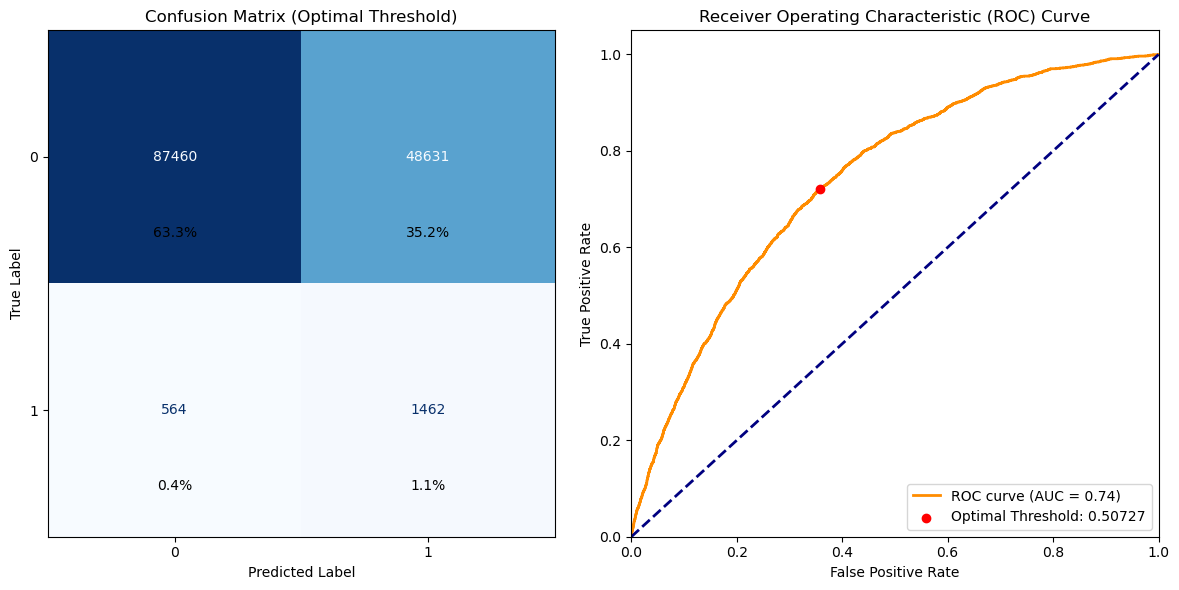

In [29]:
log_reg1_results = compute_metrics(log_reg1, X_train_processed, y_train, X_test_processed, y_test, scorer=scorer, model_name="Logistic Regression1")

In [64]:
results2 = pd.concat([results2, log_reg1_results], axis=0)

**Anpassung des Thresholds:**

Da wir danach mit der vorhergesagten Klasse 1 (also Wetterverspätung), scheint die Zahl von False Positives (=fälschlicherweise vorhergesagt Wetterverspätung in 48'631 Fällen) zu hoch zu sein. Mit dem Anpassen des Thresholds nach oben würden wir diese Zahl herunterkriegen, weil dann es dann eine höhere Wahrscheinlichkeit bei den vorhersagen braucht, damit die Klasse 1 zugewiesen wird.

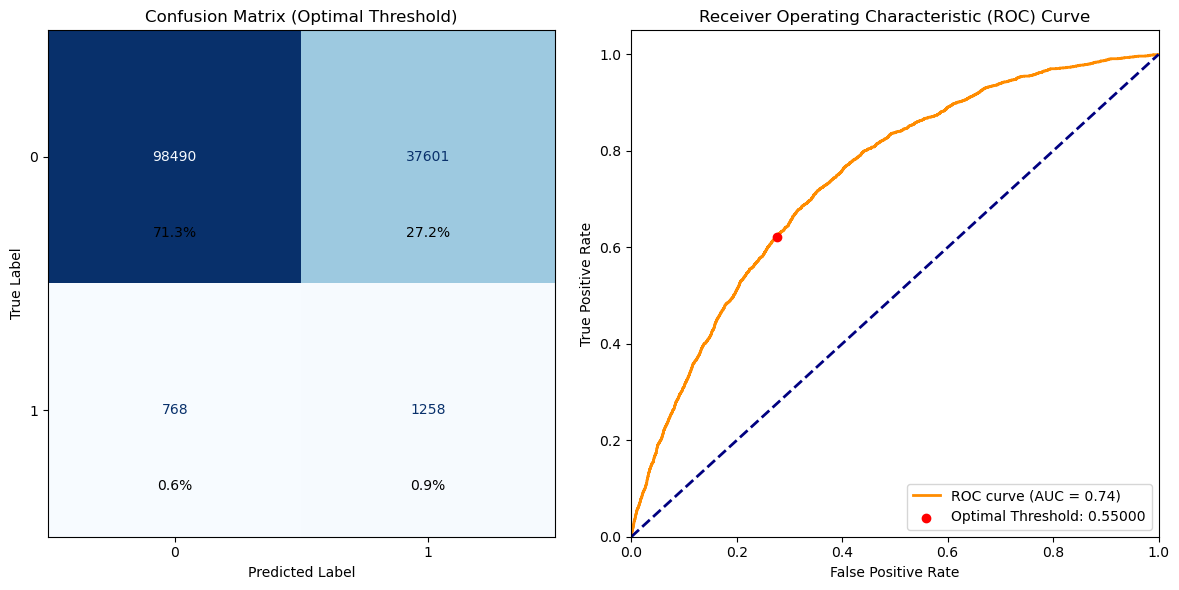

In [61]:
log_reg1_results2 = compute_metrics2(log_reg1, X_train_processed, y_train, X_test_processed, y_test, scorer=scorer, model_name="Logistic Regression1 (new threshold)", optimal_threshold=0.55)

In [65]:
results2 = pd.concat([results2, log_reg1_results2], axis=0)

In [66]:
results2

Model Train_CV  Accuracy  Precision  \
0                  Logistic Regression1     Test  0.643816   0.029186   
0  Logistic Regression1 (new threshold)     Test  0.722199   0.032373   

     Recall  F1-Score  Best Threshold (J-statistic)  
0  0.721619  0.056102                      0.507269  
0  0.620928  0.061538                      0.550000

Wir sehen, dass wir den Precision Score erhöhen konnten, sich jedoch der Recall dadurch verringerte.

### Approach mit Smote

Da wir es mit einem stark unbalancierten Dataset zu tun haben, möchten wir nun SMOTE anwenden. SMOTE (Synthetic Minority Over-sampling Technique) ist eine Methode, die in der maschinellen Lern-Pipeline verwendet wird, um mit unausgewogenen Datensätzen umzugehen. Insbesondere wird es verwendet, wenn eine der Klassen (meist die unterrepräsentierte Klasse) deutlich weniger Datenpunkte hat als die andere (die überrepräsentierte Klasse).

In [32]:
# SMOTE auf die Trainingsdaten anwenden
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train)

In [37]:
log_reg3 = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

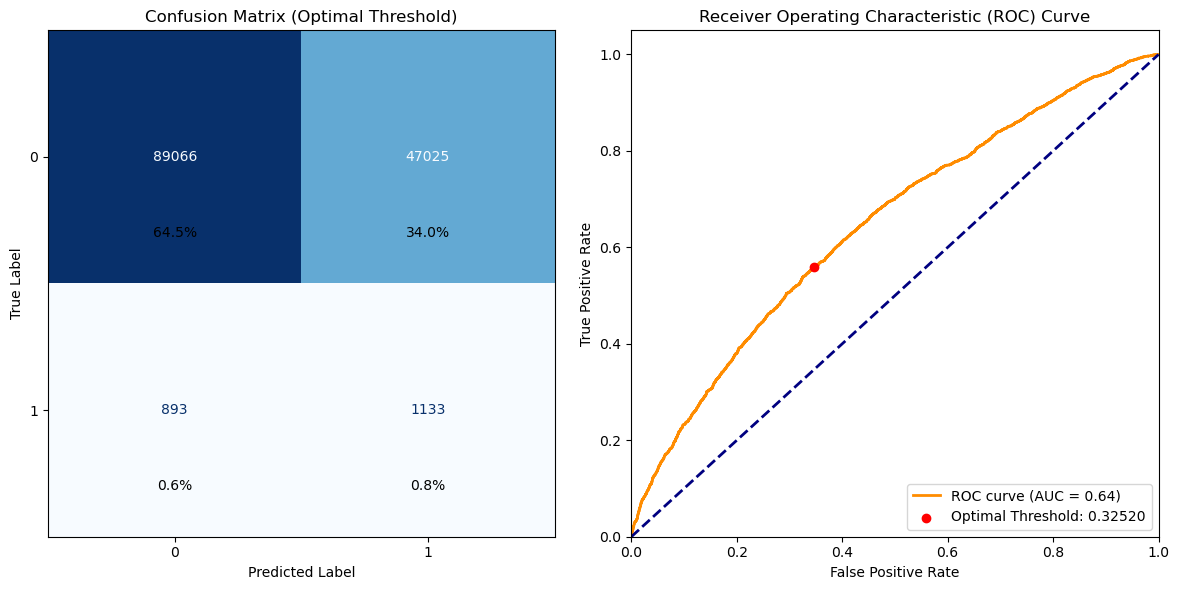

In [ ]:
log_reg3_results = compute_metrics(log_reg3, X_train_balanced, y_train_balanced, X_test_processed, y_test, scorer=scorer, model_name="Logistic Regression 2 (SMOTE)")

In [67]:
results2 = pd.concat([results2, log_reg3_results], axis=0)

Die ROC curve sieht nun stark schlechter aus.

## 2.1.2 XGBoost (Gradient-Boosting)

**XGBoost** ist eine leistungsstarke Boosting-Methode, die eine sequentielle Modellierung von Entscheidungsbäumen verwendet. Die Bäume werden so aufgebaut, dass sie die Fehler der vorherigen Bäume korrigieren, was zu einer besseren Gesamtleistung führt. XGBoost ist bekannt für seine hohe Leistung, insbesondere bei großen Datensätzen und komplexen Modellen. Die **Gradient Boosting**-Methode hat sich als sehr effizient für die Klassifizierung mit unausgewogenen Datensätzen erwiesen. Sie bietet eine robuste Leistung, ist in der Lage, komplexe Muster zu lernen und bietet starke Regularisierungsmechanismen. Deswegen wollen wir mit diesem Modell nun schauen, was wir mit einer Klassifikation herausholen könnten.

**Vorteile:**
+ Hohe Genauigkeit: XGBoost erzielt oft sehr gute Ergebnisse und ist einer der führenden Algorithmen in vielen Wettbewerben für maschinelles Lernen.
+ Flexibilität: Er bietet eine Vielzahl von Hyperparametern, die zur Feinabstimmung des Modells verwendet werden können, und er kann sowohl lineare als auch nicht-lineare Beziehungen gut modellieren.
+ Effizient bei unausgewogenen Datensätzen: XGBoost verfügt über eine eingebaute Methode zur Berücksichtigung von Klassenungleichgewichten (z. B. durch den scale_pos_weight-Parameter).

**Nachteile:**
+ Komplexität: Das Modell hat viele Hyperparameter, die sorgfältig abgestimmt werden müssen, was es im Vergleich zu einfacheren Modellen wie der logistischen Regression komplexer macht.
+ Computerkomplexität: Es ist ressourcenintensiv, insbesondere bei grossen Datensätzen und vielen Hyperparametern.
+ Interpretierbarkeit: Wie Random Forest ist auch XGBoost weniger interpretierbar, da es auf einer grossen Anzahl von Entscheidungsbäumen basiert.

### BayesSearchCV

Wir verwenden direkt BayesSearchCV, da wir gesehen haben, dass man damit meist bessere Ergebnisse erzielt (da "intelligenter" Optimierungsalgorithmus für Hyperparameter).

In [42]:
# parameter space for BayesSearchCV
param_space = {
    'booster': ['gbtree'],  # only 'gbtree' is used
    'colsample_bytree': Real(0.87, 0.995, prior='uniform'),  # range: 0.87 - 0.995
    'gamma': Real(0.014, 0.15, prior='uniform'),  # range: 0.014 - 0.15
    'learning_rate': Real(0.01, 0.06, prior='uniform'),  # range: 0.01 - 0.06
    'max_depth': Integer(3, 6),  # range: 3 - 6
    'min_child_weight': Integer(3, 8),  # range: 3 - 8
    'n_estimators': Integer(490, 760),  # range: 490 - 760
    'reg_alpha': Real(0.0002, 0.18, prior='uniform'),  # reange: 0.0002 - 0.18
    'reg_lambda': Real(0.05, 0.3, prior='uniform'),  # range: 0.05 - 0.3
    'scale_pos_weight': Integer(1, 5),  # range: 1 - 5
    'subsample': Real(0.78, 0.985, prior='uniform')  # range: 0.78 - 0.985
}

# define Basismodel
xgb_model = xgb.XGBClassifier(random_state=42)

# StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# create BayesSearchCV
bayes_search_xgb = BayesSearchCV(estimator=xgb_model,
                                search_spaces=param_space,
                                n_iter=70,  # number of random configuration that will be tested
                                cv=cv,  # StratifiedKFold as before
                                scoring='roc_auc',  # ROC-AUC as metric
                                n_jobs=1,  # set to 1 because parallel processing with bayesian optimization can cause issues
                                random_state=42,  # reproducibility
                                verbose=2,  # show progress
                                )

# fit BayesSearchCV on Train data
bayes_search_xgb.fit(X_train_processed, y_train)

# print best parameters
print("Beste Parameter aus BayesSearchCV:", bayes_search_xgb.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END booster=gbtree, colsample_bytree=0.9609657178971657, gamma=0.1408700478433054, learning_rate=0.025789979674352433, max_depth=5, min_child_weight=5, n_estimators=585, reg_alpha=0.13316286130743762, reg_lambda=0.12611582775912655, scale_pos_weight=4, subsample=0.8927426080710057; total time=  11.6s
[CV] END booster=gbtree, colsample_bytree=0.9609657178971657, gamma=0.1408700478433054, learning_rate=0.025789979674352433, max_depth=5, min_child_weight=5, n_estimators=585, reg_alpha=0.13316286130743762, reg_lambda=0.12611582775912655, scale_pos_weight=4, subsample=0.8927426080710057; total time=   9.7s
[CV] END booster=gbtree, colsample_bytree=0.9609657178971657, gamma=0.1408700478433054, learning_rate=0.025789979674352433, max_depth=5, min_child_weight=5, n_estimators=585, reg_alpha=0.13316286130743762, reg_lambda=0.12611582775912655, scale_pos_weight=4, subsample=0.8927426080710057; total time=  10.8s
[CV] END booster=gbt

Wir haben folgende Hyperparemter gefunden:

Beste Parameter aus BayesSearchCV: OrderedDict({'booster': 'gbtree', 'colsample_bytree': 0.995, 'gamma': 0.014, 'learning_rate': 0.04944699914723699, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 760, 'reg_alpha': 0.18, 'reg_lambda': 0.3, 'scale_pos_weight': 1, 'subsample': 0.78})

In [43]:
# best Hyperparameters from BayesSearchCV
best_params1 = {
    'booster': 'gbtree',
    'colsample_bytree': 0.995,
    'gamma': 0.014,
    'learning_rate': 0.04944699914723699,
    'max_depth': 6,
    'min_child_weight': 3,
    'n_estimators': 760,
    'reg_alpha': 0.18,
    'reg_lambda': 0.3,
    'scale_pos_weight': 1,
    'subsample': 0.78
}

# Define XGBClassifier-Model with the best Hyperparameters
xgb_model_1 = xgb.XGBClassifier(
    random_state=42,  # Same random state for reproducibility
    **best_params1  # Add the best hyperparameters
)

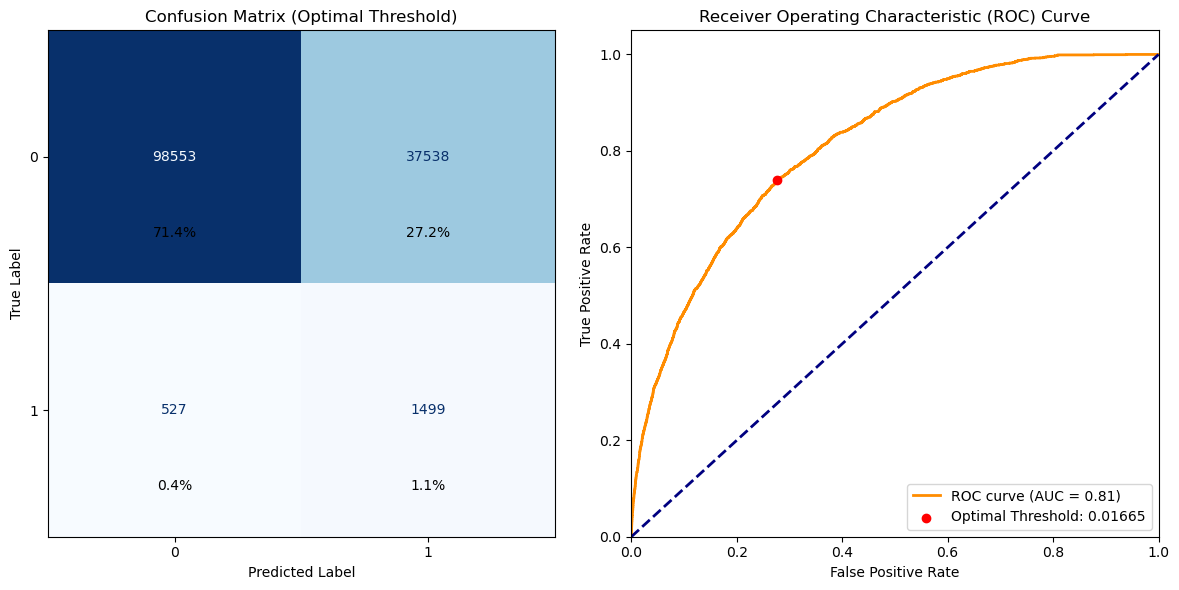

In [44]:
xgb_1_scores = compute_metrics(xgb_model_1, X_train_processed, y_train, X_test_processed, y_test, scorer=scorer, model_name="XGBClassifier 1 (BayesSearchCV)")

In [68]:
results2 = pd.concat([results2, xgb_1_scores], axis=0)

In [69]:
results2

Model Train_CV  Accuracy  Precision  \
0                  Logistic Regression1     Test  0.643816   0.029186   
0  Logistic Regression1 (new threshold)     Test  0.722199   0.032373   
0          Logistic Regression3 (SMOTE)     Test  0.653062   0.023527   
0       XGBClassifier 1 (BayesSearchCV)     Test  0.724400   0.038399   

     Recall  F1-Score  Best Threshold (J-statistic)  
0  0.721619  0.056102                      0.507269  
0  0.620928  0.061538                      0.550000  
0  0.559230  0.045154                      0.325199  
0  0.739882  0.073010                      0.016646

Tatsächlich konnten wir so den ROC-AUC-Score verbessern auf 0.81. Aber wir sehen immer noch, dass es extrem viele False Positives gibt. Wir möchten nun BayesSearchCV auch auf den gesmoteten Daten anwenden.

In [72]:
# parameter space for BayesSearchCV
param_space = {
    'booster': ['gbtree'],  # only 'gbtree' is used
    'colsample_bytree': Real(0.87, 0.995, prior='uniform'),  # range: 0.87 - 0.995
    'gamma': Real(0.014, 0.15, prior='uniform'),  # range: 0.014 - 0.15
    'learning_rate': Real(0.01, 0.06, prior='uniform'),  # range: 0.01 - 0.06
    'max_depth': Integer(3, 6),  # range: 3 - 6
    'min_child_weight': Integer(3, 8),  # range: 3 - 8
    'n_estimators': Integer(490, 760),  # range: 490 - 760
    'reg_alpha': Real(0.0002, 0.18, prior='uniform'),  # reange: 0.0002 - 0.18
    'reg_lambda': Real(0.05, 0.3, prior='uniform'),  # range: 0.05 - 0.3
    'scale_pos_weight': Integer(1, 5),  # range: 1 - 5
    'subsample': Real(0.78, 0.985, prior='uniform')  # range: 0.78 - 0.985
}

# define Basismodel
xgb_model = xgb.XGBClassifier(random_state=42)

# StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# create BayesSearchCV
bayes_search_xgb = BayesSearchCV(estimator=xgb_model,
                                search_spaces=param_space,
                                n_iter=70,  # number of random configuration that will be tested
                                cv=cv,  # StratifiedKFold as before
                                scoring='roc_auc',  # ROC-AUC as metric
                                n_jobs=1,  # set to 1 because parallel processing with bayesian optimization can cause issues
                                random_state=42,  # reproducibility
                                verbose=2,  # show progress
                                )

# fit BayesSearchCV on Train data
bayes_search_xgb.fit(X_train_balanced, y_train_balanced)

# print best parameters
print("Beste Parameter aus BayesSearchCV:", bayes_search_xgb.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END booster=gbtree, colsample_bytree=0.9609657178971657, gamma=0.1408700478433054, learning_rate=0.025789979674352433, max_depth=5, min_child_weight=5, n_estimators=585, reg_alpha=0.13316286130743762, reg_lambda=0.12611582775912655, scale_pos_weight=4, subsample=0.8927426080710057; total time=  23.2s
[CV] END booster=gbtree, colsample_bytree=0.9609657178971657, gamma=0.1408700478433054, learning_rate=0.025789979674352433, max_depth=5, min_child_weight=5, n_estimators=585, reg_alpha=0.13316286130743762, reg_lambda=0.12611582775912655, scale_pos_weight=4, subsample=0.8927426080710057; total time=  22.8s
[CV] END booster=gbtree, colsample_bytree=0.9609657178971657, gamma=0.1408700478433054, learning_rate=0.025789979674352433, max_depth=5, min_child_weight=5, n_estimators=585, reg_alpha=0.13316286130743762, reg_lambda=0.12611582775912655, scale_pos_weight=4, subsample=0.8927426080710057; total time=  22.8s
[CV] END booster=gbt

Beste Parameter aus BayesSearchCV: OrderedDict({'booster': 'gbtree', 'colsample_bytree': 0.995, 'gamma': 0.15, 'learning_rate': 0.06, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 760, 'reg_alpha': 0.02276324530745919, 'reg_lambda': 0.28188981298566596, 'scale_pos_weight': 1, 'subsample': 0.78})

In [73]:
# best Hyperparameters from BayesSearchCV
best_params2 = {
    'booster': 'gbtree',
    'colsample_bytree': 0.995,
    'gamma': 0.15,
    'learning_rate': 0.06,
    'max_depth': 6,
    'min_child_weight': 3,
    'n_estimators': 760,
    'reg_alpha': 0.02276324530745919,
    'reg_lambda': 0.28188981298566596,
    'scale_pos_weight': 1,
    'subsample': 0.78
}

# Define XGBClassifier-Model with the best Hyperparameters
xgb_model_2 = xgb.XGBClassifier(
    random_state=42,  # Same random state for reproducibility
    **best_params2  # Add the best hyperparameters
)

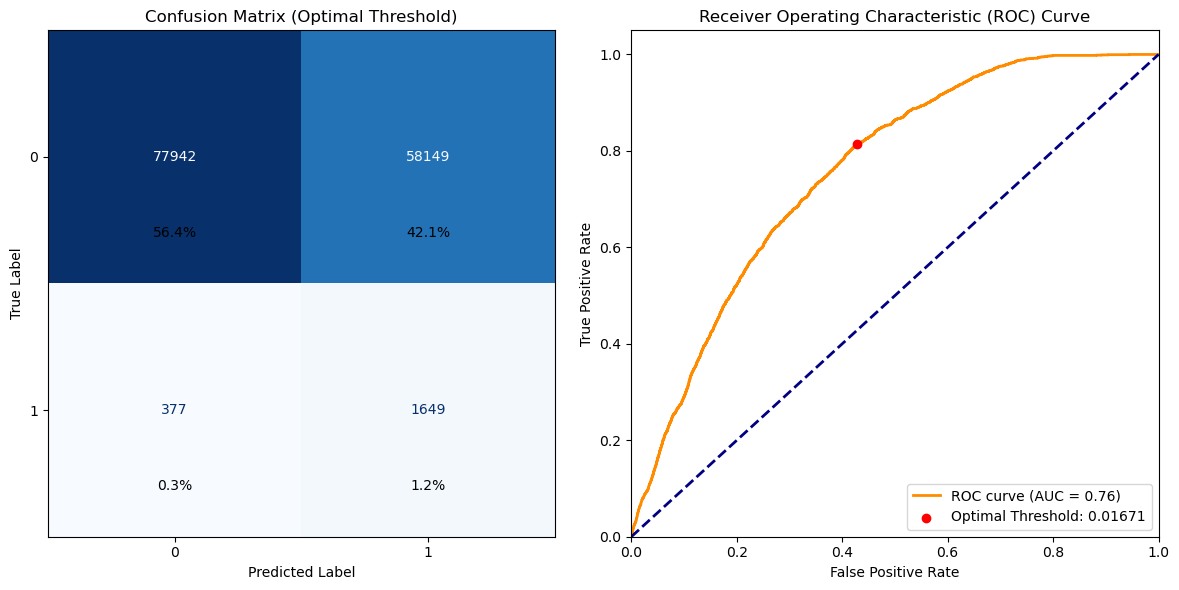

In [74]:
xgb_2_scores = compute_metrics(xgb_model_2, X_train_balanced, y_train_balanced, X_test_processed, y_test, scorer=scorer, model_name="XGBClassifier 2 (SMOTE)")

In [75]:
results2 = pd.concat([results2, xgb_2_scores], axis=0)

In [76]:
results2

Model Train_CV  Accuracy  Precision  \
0                  Logistic Regression1     Test  0.643816   0.029186   
0  Logistic Regression1 (new threshold)     Test  0.722199   0.032373   
0          Logistic Regression3 (SMOTE)     Test  0.653062   0.023527   
0       XGBClassifier 1 (BayesSearchCV)     Test  0.724400   0.038399   
0               XGBClassifier 2 (SMOTE)     Test  0.576258   0.027576   

     Recall  F1-Score  Best Threshold (J-statistic)  
0  0.721619  0.056102                      0.507269  
0  0.620928  0.061538                      0.550000  
0  0.559230  0.045154                      0.325199  
0  0.739882  0.073010                      0.016646  
0  0.813919  0.053345                      0.016715

Das Ergebnis ist leider schlechter... wie bereits zuvor bei der LogReg schneiden wir mit SMOTE schlechter ab. Dies könnte daran liegen, dass durch SMOTE das Klassenungleichgewicht behoben wird und dann die effektive Leistung der Features zu Geltung kommt. Zuvor ohne Smote werden wir durch die strake Imbalance immer den grössten Teil der Vorhersagen richtig treffen, nämlich keine Verspätung.

Mit diesem Ansatz kommen wir so nicht weiter. Wir wollen deswegen eine neue Herangehensweise probieren.

# 3.Regression (Neue Herangehensweise)

Unsere Idee, zuerst eine Klassifikation und mit den wetterbedingten Verspätungen eine Regression durchzuführen, war nicht ganz durchdacht. Wir möchten uns nun nur mehr auf die wetterbedingten Verspätungen konzentrieren. Damit können wir unsere Probleme nicht lösen. Damit verändert sich die Annahme hinter unserer Vorhersage: "Wenn ein Flug wetterbedingt verspätet ist, wie gross ist diese". Wir sind uns bewusst, dass dies für unseren Use Case nicht sehr realistisch ist, denn Fluggäste können nicht zwei Tage vorher wissen, dass ihr Flug sicher verspätet ist.

In [303]:
y = flights["WEATHER_DELAY"]

In [179]:
y.describe()


count    460390.000000
mean          0.645377
std           9.313301
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         991.000000
Name: WEATHER_DELAY, dtype: float64

In [304]:
# Speichere alle Indizes, bei denen y den Wert 0 enthält
indices_to_drop = y[y == 0].index

# Droppe diese Zeilen aus dem DataFrame
y_dropped = y.drop(indices_to_drop)

In [305]:
y_dropped

153        1.0
207        9.0
228        8.0
251        2.0
287        4.0
          ... 
459843    14.0
459914    15.0
459938    35.0
460054    33.0
460283    21.0
Name: WEATHER_DELAY, Length: 6754, dtype: float64

In [99]:
indices_to_drop

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       460380, 460381, 460382, 460383, 460384, 460385, 460386, 460387, 460388,
       460389],
      dtype='int64', length=453636)

In [308]:
# Zeilen anhand der angegebenen Indizes entfernen
X = X.drop(indices_to_drop, axis=0)

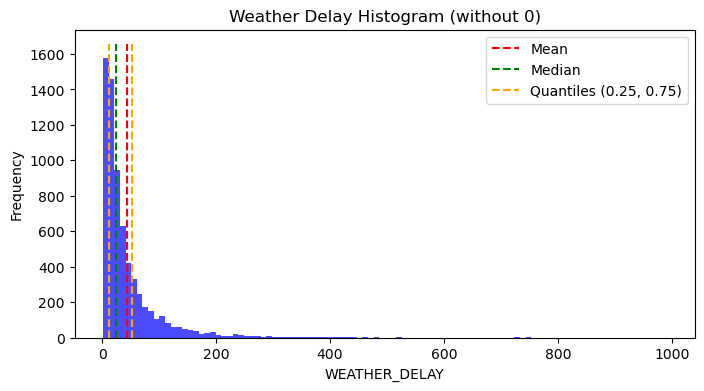

count    6754.000000
mean       43.992449
std        63.294154
min         1.000000
25%        11.000000
50%        24.000000
75%        52.000000
max       991.000000
Name: WEATHER_DELAY, dtype: float64

In [309]:


fig, ax = plt.subplots(figsize=(8, 4))

# Zeichne das Histogramm nur für Werte > 0
ax.hist(y_dropped, bins=100, color='blue', alpha=0.7)

# Berechne den maximalen Wert der Y-Achse
ymax = ax.get_ylim()[1] # Maximum of the y-axis

# Zeichne die Mittelwert- und Median-Linien
ax.vlines([y_dropped.mean()], ymin=0, ymax=ymax, linestyles="dashed", 
          colors=["red"], label="Mean")
ax.vlines([y_dropped.median()], ymin=0, ymax=ymax, linestyles="dashed",
            colors=["green"], label="Median")

# Zeichne die 0.25 und 0.75 Quantile
ax.vlines([y_dropped.quantile(0.25), y_dropped.quantile(0.75)], ymin=0, ymax=ymax,
            linestyles="dashed", colors=["orange", "orange"], label="Quantiles (0.25, 0.75)")

# Setze das x-Achsenlimit (nur für Werte größer als 0)
#ax.set_xlim(0, 200)  # Limit der x-Achse

# Füge die Legende hinzu
ax.legend()

# Setze Beschriftungen und Titel
ax.set_xlabel("WEATHER_DELAY")
ax.set_ylabel("Frequency")
ax.set_title("Weather Delay Histogram (without 0)")

# Zeige den Plot
plt.show()

# Zeige deskriptive Statistiken der WEATHER_DELAY Spalte
y_dropped.describe()

Wir sehen, dass wir extreme Ausreisser nach oben haben. Wir haben zunächst Modelle inklusive den Ausreissern probiert. Bei der LinReg erzielten wir jedoch einen RMSE von mehr als 60 Minuten. Bei der Log-Reg (da rechtsschiefe Verteilung) erhielten wir noch extremere RMSE's. Deswegen haben wir schrittweise die Extremwerte aus dem Dataset ausgeschlossen. Eine genauere Diskussion dazu befindet sich im Fazit weiter unten.

In [310]:
# Speichere alle Indizes, bei denen y den Wert 0 enthält
indices_to_drop2 = y_dropped[y_dropped > 200].index

# Droppe diese Zeilen aus dem DataFrame
y_dropped = y_dropped.drop(indices_to_drop2)

In [311]:
# Zeilen anhand der angegebenen Indizes entfernen
X = X.drop(indices_to_drop2, axis=0)

In [312]:
X.to_csv("X.csv", index=False)

In [313]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y_dropped.shape}")

Shape of X: (6576, 72)
Shape of y: (6576,)


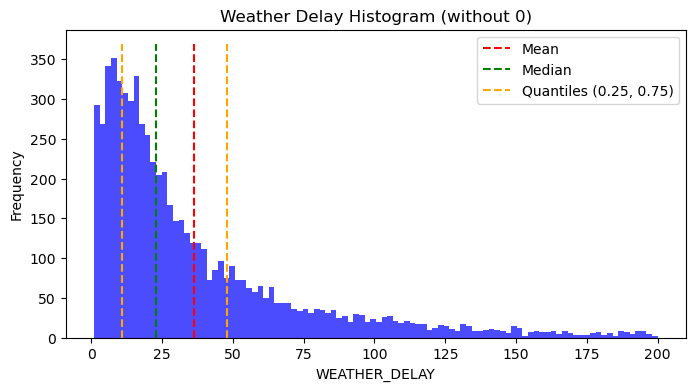

count    6576.000000
mean       36.450730
std        37.768227
min         1.000000
25%        11.000000
50%        23.000000
75%        48.000000
max       200.000000
Name: WEATHER_DELAY, dtype: float64

In [316]:


fig, ax = plt.subplots(figsize=(8, 4))

# Zeichne das Histogramm nur für Werte > 0
ax.hist(y_dropped, bins=100, color='blue', alpha=0.7)

# Berechne den maximalen Wert der Y-Achse
ymax = ax.get_ylim()[1] # Maximum of the y-axis

# Zeichne die Mittelwert- und Median-Linien
ax.vlines([y_dropped.mean()], ymin=0, ymax=ymax, linestyles="dashed", 
          colors=["red"], label="Mean")
ax.vlines([y_dropped.median()], ymin=0, ymax=ymax, linestyles="dashed",
            colors=["green"], label="Median")

# Zeichne die 0.25 und 0.75 Quantile
ax.vlines([y_dropped.quantile(0.25), y_dropped.quantile(0.75)], ymin=0, ymax=ymax,
            linestyles="dashed", colors=["orange", "orange"], label="Quantiles (0.25, 0.75)")

# Setze das x-Achsenlimit (nur für Werte größer als 0)
#ax.set_xlim(0, 200)  # Limit der x-Achse

# Füge die Legende hinzu
ax.legend()

# Setze Beschriftungen und Titel
ax.set_xlabel("WEATHER_DELAY")
ax.set_ylabel("Frequency")
ax.set_title("Weather Delay Histogram (without 0)")

# Zeige den Plot
plt.show()

# Zeige deskriptive Statistiken der WEATHER_DELAY Spalte
y_dropped.describe()

In [315]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_dropped, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 5260 samples
Test set: 1316 samples


In [185]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5015 entries, 118199 to 39296
Data columns (total 72 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   DISTANCE                                                              5015 non-null   int64  
 1   SCHEDULED_DEPARTURE_DATETIME_tmpc                                     5015 non-null   float64
 2   SCHEDULED_DEPARTURE_DATETIME_sped                                     5015 non-null   float64
 3   SCHEDULED_DEPARTURE_DATETIME_p01m                                     5015 non-null   float64
 4   SCHEDULED_DEPARTURE_DATETIME_vsby                                     5015 non-null   float64
 5   departure_6hr_before_tmpc                                             5015 non-null   float64
 6   departure_6hr_before_sped                                             5015 non-null   float64
 

In [317]:
# Apply OneHotEncoder to categorical columns, and scale numerical columns
numeric_features = [
                    'DISTANCE', 'SCHEDULED_DEPARTURE_DATETIME_tmpc',
                    'SCHEDULED_DEPARTURE_DATETIME_sped',
                    'SCHEDULED_DEPARTURE_DATETIME_p01m',
                    'SCHEDULED_DEPARTURE_DATETIME_vsby', 'departure_6hr_before_tmpc',
                    'departure_6hr_before_sped', 'departure_6hr_before_p01m',
                    'departure_6hr_before_vsby', 'departure_1hr_before_tmpc',
                    'departure_1hr_before_sped', 'departure_1hr_before_p01m',
                    'departure_1hr_before_vsby', 'departure_1hr_after_tmpc',
                    'departure_1hr_after_sped', 'departure_1hr_after_p01m',
                    'departure_1hr_after_vsby', 'departure_6hr_after_tmpc',
                    'departure_6hr_after_sped', 'departure_6hr_after_p01m',
                    'departure_6hr_after_vsby', 'SCHEDULED_ARRIVAL_DATETIME_tmpc',
                    'SCHEDULED_ARRIVAL_DATETIME_sped', 'SCHEDULED_ARRIVAL_DATETIME_p01m',
                    'SCHEDULED_ARRIVAL_DATETIME_vsby', 'arrival_6hr_before_tmpc',
                    'arrival_6hr_before_sped', 'arrival_6hr_before_p01m',
                    'arrival_6hr_before_vsby', 'arrival_1hr_before_tmpc',
                    'arrival_1hr_before_sped', 'arrival_1hr_before_p01m',
                    'arrival_1hr_before_vsby', 'arrival_1hr_after_tmpc',
                    'arrival_1hr_after_sped', 'arrival_1hr_after_p01m',
                    'arrival_1hr_after_vsby', 'arrival_6hr_after_tmpc',
                    'arrival_6hr_after_sped', 'arrival_6hr_after_p01m',
                    'arrival_6hr_after_vsby', 'AVERAGE_WEATHER_DELAY'
]
categorical_features = [
    'WEEKEND'
]

# take remaining features (because they have already been processed)
remaining_features_test = [col for col in X_test.columns if col not in numeric_features + categorical_features]
remaining_features_train = [col for col in X_train.columns if col not in numeric_features + categorical_features]
# create a DataFrame with the already processed features
X_remaining_test = X_test[remaining_features_test].reset_index(drop=True)
X_remaining_train = X_train[remaining_features_train].reset_index(drop=True)

# Process numeric features: scaling
scaler = StandardScaler()
X_train_numeric = X_train[numeric_features]
X_test_numeric = X_test[numeric_features]
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Process categorical features: dummy coding
encoder = OneHotEncoder(handle_unknown="ignore", drop="first")
X_train_categorical = X_train[categorical_features]
X_test_categorical = X_test[categorical_features]
X_train_encoded = encoder.fit_transform(X_train_categorical).toarray()
X_test_encoded = encoder.transform(X_test_categorical).toarray()


In [318]:
# Combine numeric and categorical features back
X_train_encoded = pd.DataFrame(X_train_encoded, columns= encoder.get_feature_names_out())
X_test_encoded = pd.DataFrame(X_test_encoded, columns= encoder.get_feature_names_out())
X_train_scaled = pd.DataFrame(X_train_scaled, columns= scaler.get_feature_names_out())
X_test_scaled = pd.DataFrame(X_test_scaled, columns= scaler.get_feature_names_out())

X_train_processed = pd.concat([X_train_scaled, X_train_encoded, X_remaining_train], axis=1)
X_test_processed = pd.concat([X_test_scaled, X_test_encoded, X_remaining_test], axis=1)

# Check the result
print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"X_test_processed shape: {X_test_processed.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_processed shape: (5260, 72)
X_test_processed shape: (1316, 72)
y_train shape: (5260,)
y_test shape: (1316,)


In [582]:
from joblib import dump

dump(scaler, 'scaler.joblib')

['scaler.joblib']

# 3.1 Modelle

## 3.1.1 Funktionen

In [359]:
# Set the default face colors to white
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['axes.facecolor'] = 'white'

# Now all plots will have a white background by default
plt.style.use("seaborn-v0_8-muted")

In [510]:
# We are going to create many models, let us keep track of their performance on cross-validation
# We will use a dataframe to store the results (a dictionary would be fine, but 
# a dataframe is more convenient for plotting and computing statistics)
results = pd.DataFrame({"Model": [], "Train_CV": [], "RMSE": [], "MAE": [], "R2": []})

In [368]:
# Make a scorer that computes the given loss function (mse, mae, etc.) on the
# exponential of the predictions (since we log-scaled the y values)
# This is quite advanced, feel free to ignore it

def make_scorefunc(loss_func, exp_pred=False, greater_is_better=False):
    if exp_pred:
        def scorer(y, y_pred):
            return loss_func(np.exp(y), np.exp(y_pred))
    else:
        def scorer(y, y_pred):
            return loss_func(y, y_pred)
    return make_scorer(scorer, greater_is_better=greater_is_better)

In [369]:
# Create the scorer dictionaries for the cross_val_score function
exp_scorer = {
    "RMSE": make_scorefunc(rmse, exp_pred=True),
    "MAE": make_scorefunc(mae, exp_pred=True),
    "R2": make_scorefunc(r2_score, exp_pred=True, greater_is_better=True)
}

scorer = {
    "RMSE": make_scorefunc(rmse),
    "MAE": make_scorefunc(mae),
    "R2": make_scorefunc(r2_score, greater_is_better=True)
}

In [370]:
# Compute the metrics on the training set and on the cross-validation
def compute_metrics(model, X, y, scorer, model_name=None):
    # Extract the names from the scorer dictionary
    scorer_names = list(scorer.keys())

    # Fit the model to the training set
    model.fit(X, y)
    
    # Compute the metrics on the whole training set, and on the cross-validation
    
    # Create a dictionary for the pandas dataframe
    train_scores = {"Model": model_name, "CV_Train": "Train",}
    # Iterate over the scorers 
    for k in scorer_names:
        train_scores[k] = scorer[k](model, X, y)
    
    train_scores = pd.DataFrame(train_scores, index=[0])

    # Keep the same CV for all evaluations, for fair comparison
    cv = KFold(n_splits=5, shuffle=True, random_state=144)

    # Compute the cross-validation metrics
    cv_scores = cross_validate(model, X, y, cv=cv, 
                               scoring=scorer)
    
    # Compute means and standard deviation of the metrics on the cross-validation
    cv_scores_mean = {"Model": model_name, "CV_Train": "CV",}
    cv_scores_sd = {"Model": model_name, "CV_Train": "CV",}
    # Iterate over the scorers
    for k in scorer_names:
        cv_scores_mean[k] = cv_scores[f"test_{k}"].mean()
        cv_scores_sd[f"{k} (SD)"] = cv_scores[f"test_{k}"].std()
    
    cv_scores_mean = pd.DataFrame(cv_scores_mean, index=[0])
    cv_scores_sd = pd.DataFrame(cv_scores_sd, index=[0])

    cv_scores = pd.merge(cv_scores_mean, cv_scores_sd, on=["Model", "CV_Train"])

    # Aggregate the results
    full_scores = pd.concat([train_scores, cv_scores])

    return full_scores

In [371]:
# Create a visualization function to help ourselves, once again this is tricky, 
# you can do plots manually, but this is more convenient
def visualize_results(results):
    # From CV, we have negative MAE/MSE
    for col in results.columns:
        if "MAE" in col or "RMSE" in col:
            results[col] = np.abs(results[col])
    # Reshape the data for RMSE, MAE, R2
    df_rmse = results.pivot(index='Model', columns='CV_Train', values='RMSE')
    df_mae = results.pivot(index='Model', columns='CV_Train', values='MAE')
    df_r2 = results.pivot(index='Model', columns='CV_Train', values='R2')

    df_rmse_sd =results.pivot(index='Model', columns='CV_Train', values='RMSE (SD)')
    df_mae_sd = results.pivot(index='Model', columns='CV_Train', values='MAE (SD)')
    df_r2_sd = results.pivot(index='Model', columns='CV_Train', values='R2 (SD)')

    all_dfs = [df_rmse, df_mae, df_r2]
    sd_dfs = [df_rmse_sd, df_mae_sd, df_r2_sd]

    # Create a figure with 2x3 subplots
    fig, axs = plt.subplots(2, 3, figsize=(16, 6))

    names = ["RMSE", "MAE", "R2"]

    # In the upper row, we plot the train MSE, MAE and R2
    for i, ax in enumerate(axs[0, :]):
        nm = names[i]
        df = all_dfs[i]
        ax.barh(df.index, df["Train"], color="C0", alpha=0.8, label="Train")
        ax.set_title(nm)
        ax.set_ylabel(nm)
        ax.set_xlabel("")
        ax.grid(alpha=0.3)
        ax.tick_params(axis='x', rotation=45)
        # ax.legend(title=False)

    # In the bottom row we plot the CV MSE, MAE and R2 (including errorbars)
    for i, ax in enumerate(axs[1, :]):
        nm = names[i]
        df = all_dfs[i]
        df_sd = sd_dfs[i]

        # Add barplot
        ax.barh(df.index, df["CV"], color="C1", alpha=0.8, label="CV")
        # Add error bars
        ax.errorbar(df["CV"], df.index, xerr=df_sd["CV"], fmt='none', color='black', capsize=5)

        ax.set_title(nm)
        ax.set_ylabel(nm)
        ax.set_xlabel("")
        ax.grid(alpha=0.3)
        ax.tick_params(axis='x', rotation=45)
        # ax.legend(title=False)°
        
    # Custom legend
    train_patch = mpatches.Patch(color="C0", alpha=0.8, label="Train")
    cv_patch = mpatches.Patch(color="C1", alpha=0.8, label="CV")
    fig.legend(handles=[train_patch, cv_patch], loc='upper center', bbox_to_anchor=(0.5, -0.05), 
           fancybox=True, shadow=True, ncol=3)
    plt.tight_layout()
    plt.show()

## 3.1.1 Linear Regression

In [511]:
linreg = LinearRegression()

# Compute the metrics for the linear regression model
linreg_scores = compute_metrics(linreg, X_train_processed, y_train, scorer=scorer, model_name="Linear Regression")

In [512]:
linreg2 = LinearRegression()

logy = np.log(y_train)

# Compute the metrics for the log-linear model
linreg_log_scores = compute_metrics(linreg2, X_train_processed, logy, scorer=exp_scorer, model_name="Log-Linear Regression")

In [513]:
results = pd.concat([results, linreg_scores, linreg_log_scores], axis=0)
results

Model  Train_CV        RMSE        MAE          R2  \
0      Linear Regression       NaN  -35.956062 -25.822845    0.095741   
0      Linear Regression       NaN  -36.556092 -26.184047    0.062557   
0  Log-Linear Regression       NaN  -98.184015 -25.420180   -5.742641   
0  Log-Linear Regression       NaN -415.264491 -36.317694 -501.926249   

  CV_Train   RMSE (SD)   MAE (SD)      R2 (SD)  
0    Train         NaN        NaN          NaN  
0       CV    1.083588   0.515306     0.016870  
0    Train         NaN        NaN          NaN  
0       CV  747.119818  23.735597  1003.392069

Wir sehen, dass die Log-Transformation des Labels spezielle RMSE und R^2 Werte liefert. Die könnte an den Ausreissern liegen, die v.a. bei der CV die Resultate verzerren. Wir haben hier ziemlich lange versucht, Lösungen zu finden (z.B. haben wir uns die Box-Cox Transformation angeschaut, oder haben versucht, die log-transformatin mit np.log(y_train+1) zu erweitern). Doch trotz diesen Massnahmen, haben wir keine Erklärung finden können, wieso der Score v.a. bei der CV so etreme Werte annimmt. Deswegen werden wir das Ergebnis der Log-Linear Regression aus unserem results Dataframe herausnehmen.

In [514]:
results = results[results['Model'] != 'Log-Linear Regression']

In [515]:
results

Model  Train_CV       RMSE        MAE        R2 CV_Train  \
0  Linear Regression       NaN -35.956062 -25.822845  0.095741    Train   
0  Linear Regression       NaN -36.556092 -26.184047  0.062557       CV   

   RMSE (SD)  MAE (SD)  R2 (SD)  
0        NaN       NaN      NaN  
0   1.083588  0.515306  0.01687

/var/folders/yg/_yglls0s5958b_wpb6zlpk8h0000gn/T/ipykernel_74472/3724886762.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results[col] = np.abs(results[col])


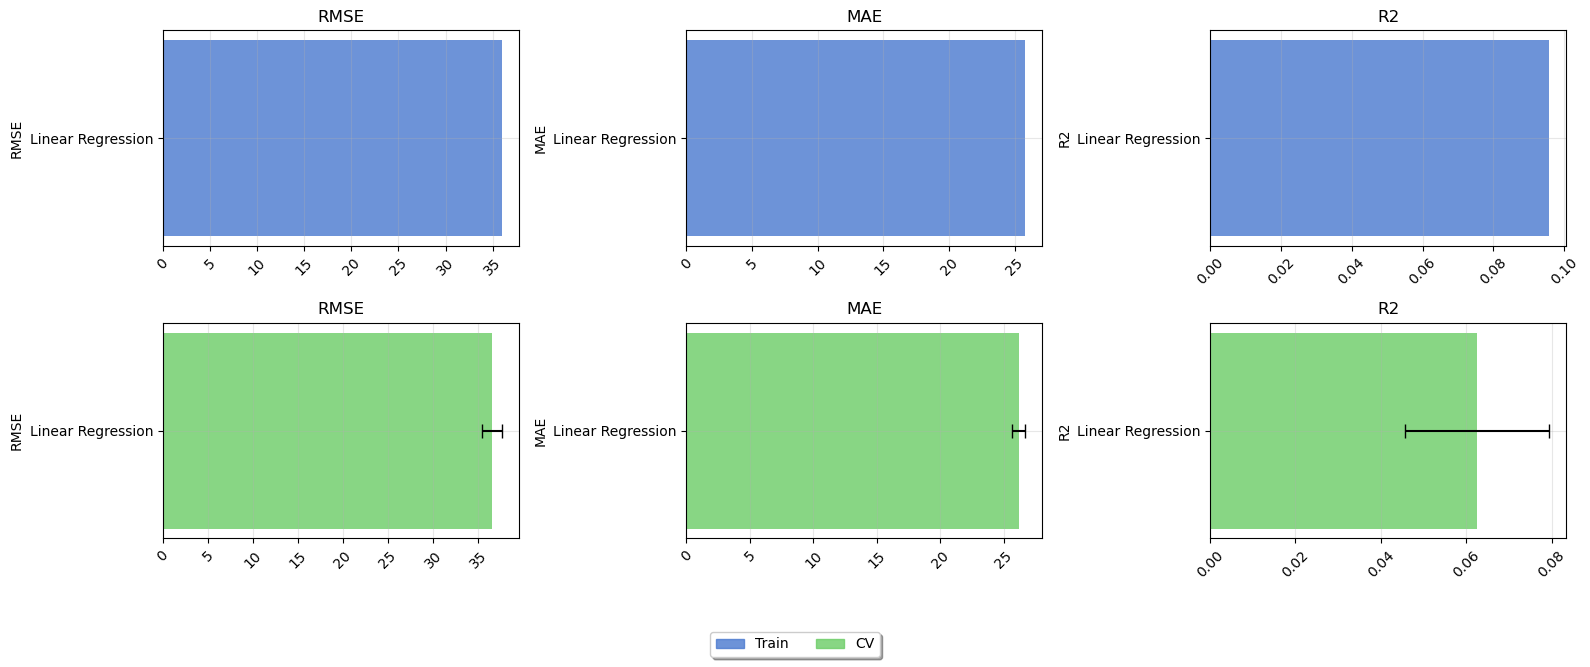

In [516]:
visualize_results(results) # copy warnung wegen code 2 Zellnen darüber

## 3.1.2 Ridge und LassoCV

Da wir in unserem kleinen Dataframe doch 72 Features haben, wollen wir mit RidgeCV oder LassoCV die "wenig gebräuchlichen" Features finden und diese droppen

In [517]:
# Make our CV to select the best alpha on each model
cv = KFold(n_splits=5, shuffle=True, random_state=72)

In [ ]:


# Lasso- und Ridge-Modelle mit Cross-Validation
lasso = LassoCV(cv=cv, tol=1e-2)  # Lasso mit Cross-Validation
ridge = RidgeCV(cv=cv)  # Ridge mit Cross-Validation

# Fit der Modelle auf die Daten
lasso.fit(X_train_processed, y_train)
ridge.fit(X_train_processed, y_train)

# Extrahiere die beste Regularisierungsstärke (Alpha)
alpha_lasso = lasso.alpha_  # Beste Alpha für Lasso
alpha_ridge = ridge.alpha_  # Beste Alpha für Ridge

print(f"Best Alpha (Lasso): {alpha_lasso}")
print(f"Best Alpha (Ridge): {alpha_ridge}")


Best Alpha (Lasso): 0.12413494753867636
Best Alpha (Ridge): 10.0


In [519]:
# Set up lasso and ridge with best alpha according to CV
lasso_best = Lasso(alpha=alpha_lasso)
ridge_best = Ridge(alpha=alpha_ridge)

In [520]:
# Compute the metrics for the lasso model
lasso_scores = compute_metrics(lasso_best, X_train_processed, y_train, scorer=scorer, model_name="Lasso")
# Compute the metrics for the ridge model
ridge_scores = compute_metrics(ridge_best, X_train_processed, y_train, scorer=scorer, model_name="Ridge")

In [521]:
results = pd.concat([results, lasso_scores, ridge_scores], axis=0)

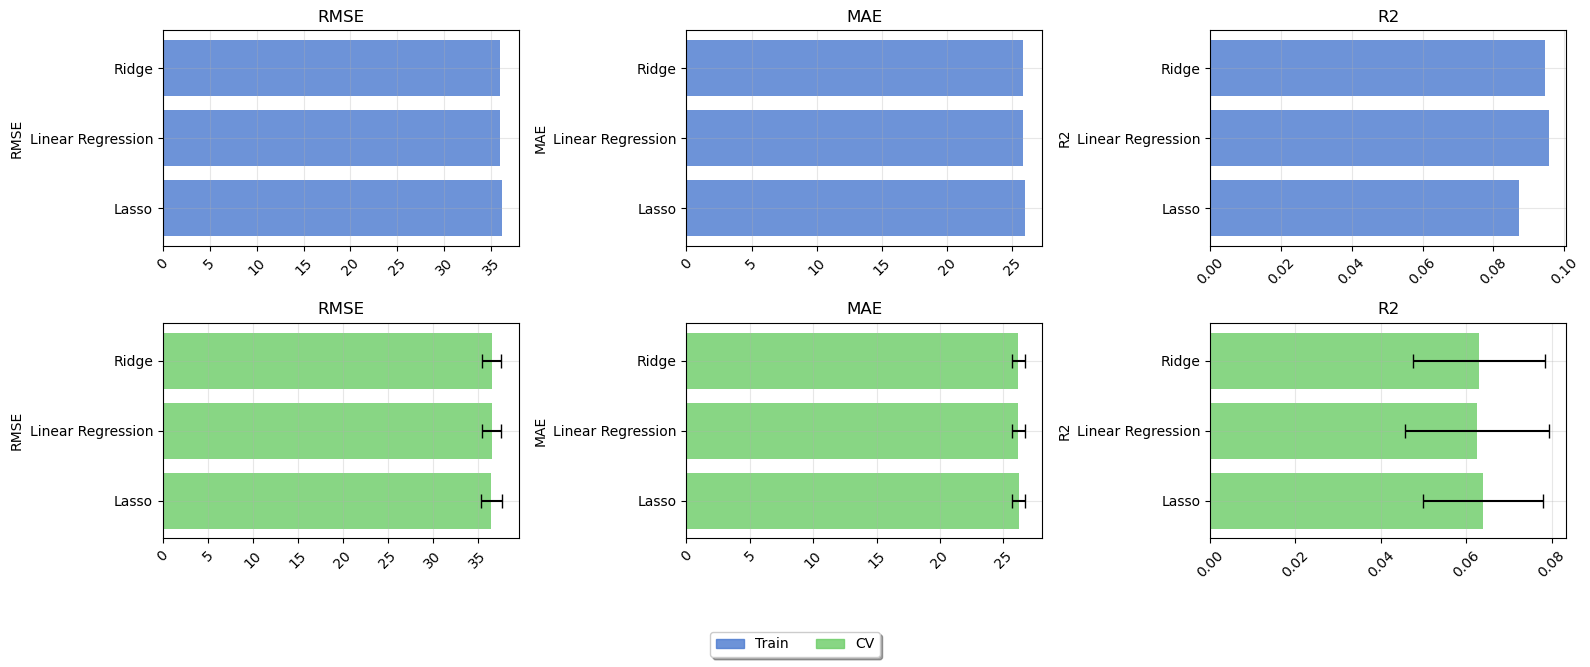

In [522]:
visualize_results(results)

Schauen wir uns nun die Koeffizienten von Ridge und Lasso an:

In [523]:
lasso_best.fit(X_train_processed, y_train)
ridge_best.fit(X_train_processed, y_train)

Ridge(alpha=10.0)

In [524]:
# Extract the coefficients
lasso_coefs = lasso_best.coef_
ridge_coefs = ridge_best.coef_

In [525]:
threshold = 1e-2

print("Lasso, number of zero coefficients:", (lasso_coefs == 0).sum())
print("Lasso, number of non-zero coefficients:", (lasso_coefs != 0).sum())

print(f"Ridge, number of coefficients below {threshold}:", (ridge_coefs < threshold).sum())
print(f"Ridge, number of coefficients above {threshold}:", (ridge_coefs >= threshold).sum())

Lasso, number of zero coefficients: 29
Lasso, number of non-zero coefficients: 43
Ridge, number of coefficients below 0.01: 33
Ridge, number of coefficients above 0.01: 39


In [526]:
# Show the coefficients that are zero for Lasso
X_train_processed.columns[lasso_coefs == 0]

Index(['SCHEDULED_DEPARTURE_DATETIME_tmpc', 'departure_6hr_before_sped',
       'departure_1hr_before_tmpc', 'departure_1hr_before_vsby',
       'departure_1hr_after_tmpc', 'departure_1hr_after_vsby',
       'departure_6hr_after_tmpc', 'SCHEDULED_ARRIVAL_DATETIME_tmpc',
       'arrival_6hr_before_tmpc', 'arrival_6hr_before_p01m',
       'arrival_1hr_before_tmpc', 'arrival_1hr_after_tmpc',
       'arrival_1hr_after_sped', 'arrival_1hr_after_vsby',
       'AIRLINE_American Eagle Airlines Inc.',
       'AIRLINE_Atlantic Southeast Airlines', 'AIRLINE_Delta Air Lines Inc.',
       'AIRLINE_Frontier Airlines Inc.', 'AIRLINE_JetBlue Airways',
       'AIRLINE_Skywest Airlines Inc.', 'AIRLINE_US Airways Inc.',
       'AIRLINE_United Air Lines Inc.',
       'Origin_AIRPORT_Los Angeles International Airport',
       'Origin_AIRPORT_McCarran International Airport',
       'Destination_AIRPORT_Denver International Airport',
       'Destination_AIRPORT_George Bush Intercontinental Airport',
       '

In [527]:
# Keep only features that are non-zero for Lasso
X_train_p = X_train_processed[X_train_processed.columns[lasso_coefs != 0]]
X_train_p

DISTANCE  SCHEDULED_DEPARTURE_DATETIME_sped  \
0    -0.295303                          -0.047199   
1    -0.565404                          -1.640107   
2    -0.758034                          -0.274757   
3     1.291801                           0.180359   
4    -0.565404                          -1.640107   
...        ...                                ...   
5255 -1.606026                           0.863034   
5256 -0.565404                           0.635476   
5257 -0.240864                           0.180359   
5258 -0.420932                          -0.957432   
5259 -0.504684                           0.407918   

      SCHEDULED_DEPARTURE_DATETIME_p01m  SCHEDULED_DEPARTURE_DATETIME_vsby  \
0                             -0.100724                           0.297646   
1                             -0.100724                           0.297646   
2                             -0.100724                           0.297646   
3                             -0.100724                           0.297646   
4                             -0.100724                          -1.362988   
...                                 ...                                ...   
5255                          -0.100724                           0.297646   
5256                          -0.100724                          -0.255899   
5257                          -0.100724                           0.297646   
5258                          -0.100724                           0.297646   
5259                          -0.100724                           0.297646   

      departure_6hr_before_tmpc  departure_6hr_before_p01m  \
0                      0.401165                  -0.100020   
1                     -0.234251                  -0.100020   
2                     -1.554367                  -0.100020   
3                     -0.429628                  -0.100020   
4                     -1.016640                  -0.099715   
...                         ...                        ...   
5255                   0.108099                  -0.100020   
5256                   0.108099                  -0.100020   
5257                   1.378930                  -0.100020   
5258                   1.330526                  -0.100020   
5259                   1.770565                  -0.100020   

      departure_6hr_before_vsby  departure_1hr_before_sped  \
0                      0.302086                   0.888716   
1                      0.302086                  -0.028848   
2                      0.302086                  -0.258239   
3                      0.302086                  -0.946412   
4                     -4.359664                  -1.634585   
...                         ...                        ...   
5255                   0.302086                   0.888716   
5256                   0.302086                  -0.028848   
5257                   0.302086                  -0.487630   
5258                   0.302086                  -0.487630   
5259                   0.302086                   1.347498   

      departure_1hr_before_p01m  departure_1hr_after_sped  ...  \
0                      -0.10197                 -0.295721  ...   
1                      -0.10197                 -0.979503  ...   
2                      -0.10197                 -0.295721  ...   
3                      -0.10197                 -0.067793  ...   
4                      -0.10197                 -1.663285  ...   
...                         ...                       ...  ...   
5255                   -0.10197                  1.071844  ...   
5256                   -0.10197                  1.071844  ...   
5257                   -0.10197                 -0.067793  ...   
5258                   -0.10197                 -0.751576  ...   
5259                   -0.10197                 -0.067793  ...   

      Origin_AIRPORT_Denver International Airport  \
0                                           False   
1                                          

In [528]:
linreg = LinearRegression()

In [529]:
# Compute the metrics for the linear regression model using splines
linreg3_scores = compute_metrics(linreg, X_train_p, y_train, scorer=scorer, model_name="Linear Regression (Feature selection)")

In [530]:
results = pd.concat([results, linreg3_scores], axis=0)

In [531]:
results

Model  Train_CV       RMSE        MAE  \
0                      Linear Regression       NaN  35.956062  25.822845   
0                      Linear Regression       NaN  36.556092  26.184047   
0                                  Lasso       NaN  36.125382  25.996635   
0                                  Lasso       NaN  36.532412  26.224900   
0                                  Ridge       NaN  35.978831  25.839904   
0                                  Ridge       NaN  36.548406  26.180372   
0  Linear Regression (Feature selection)       NaN -36.064526 -25.929252   
0  Linear Regression (Feature selection)       NaN -36.488585 -26.174427   

         R2 CV_Train  RMSE (SD)  MAE (SD)   R2 (SD)  
0  0.095741    Train        NaN       NaN       NaN  
0  0.062557       CV   1.083588  0.515306  0.016870  
0  0.087205    Train        NaN       NaN       NaN  
0  0.063903       CV   1.138418  0.525890  0.014003  
0  0.094596    Train        NaN       NaN       NaN  
0  0.062993       CV   1.096235  0.508281  0.015563  
0  0.090278    Train        NaN       NaN       NaN  
0  0.065991       CV   1.037954  0.472266  0.014228

Durch die Feature Selection mit Lasso konnten wir den RMSE von 36.55 min auf 36.48 min reduzieren.

In [532]:
lasso = LassoCV(cv=cv, tol=1e-2)
ridge = RidgeCV(cv=cv)

In [533]:
# Fit the models
lasso.fit(X_train_p, y_train)
ridge.fit(X_train_p, y_train)

# Extract the best alpha
alpha_lasso = lasso.alpha_
alpha_ridge = ridge.alpha_

In [534]:
# Set up lasso and ridge with best alpha according to CV
lasso_best = Lasso(alpha=alpha_lasso)
ridge_best = Ridge(alpha=alpha_ridge)

In [535]:
lasso_best.fit(X_train_p, y_train)
ridge_best.fit(X_train_p, y_train)

Ridge(alpha=10.0)

In [536]:
# Compute the metrics for the lasso model
lasso2_scores = compute_metrics(lasso_best, X_train_p, y_train, scorer=scorer, model_name="Lasso (Feature selection)")
# Compute the metrics for the ridge model
ridge2_scores = compute_metrics(ridge_best, X_train_p, y_train, scorer=scorer, model_name="Ridge (Feature selection)")

In [537]:
results = pd.concat([results, lasso2_scores, ridge2_scores], axis=0)

In [538]:
results

Model  Train_CV       RMSE        MAE  \
0                      Linear Regression       NaN  35.956062  25.822845   
0                      Linear Regression       NaN  36.556092  26.184047   
0                                  Lasso       NaN  36.125382  25.996635   
0                                  Lasso       NaN  36.532412  26.224900   
0                                  Ridge       NaN  35.978831  25.839904   
0                                  Ridge       NaN  36.548406  26.180372   
0  Linear Regression (Feature selection)       NaN -36.064526 -25.929252   
0  Linear Regression (Feature selection)       NaN -36.488585 -26.174427   
0              Lasso (Feature selection)       NaN -36.069468 -25.935125   
0              Lasso (Feature selection)       NaN -36.478886 -26.171734   
0              Ridge (Feature selection)       NaN -36.065463 -25.932827   
0              Ridge (Feature selection)       NaN -36.482949 -26.173142   

         R2 CV_Train  RMSE (SD)  MAE (SD)   R2 (SD)  
0  0.095741    Train        NaN       NaN       NaN  
0  0.062557       CV   1.083588  0.515306  0.016870  
0  0.087205    Train        NaN       NaN       NaN  
0  0.063903       CV   1.138418  0.525890  0.014003  
0  0.094596    Train        NaN       NaN       NaN  
0  0.062993       CV   1.096235  0.508281  0.015563  
0  0.090278    Train        NaN       NaN       NaN  
0  0.065991       CV   1.037954  0.472266  0.014228  
0  0.090028    Train        NaN       NaN       NaN  
0  0.066534       CV   1.066483  0.489665  0.013984  
0  0.090230    Train        NaN       NaN       NaN  
0  0.066304       CV   1.053893  0.484211  0.014200

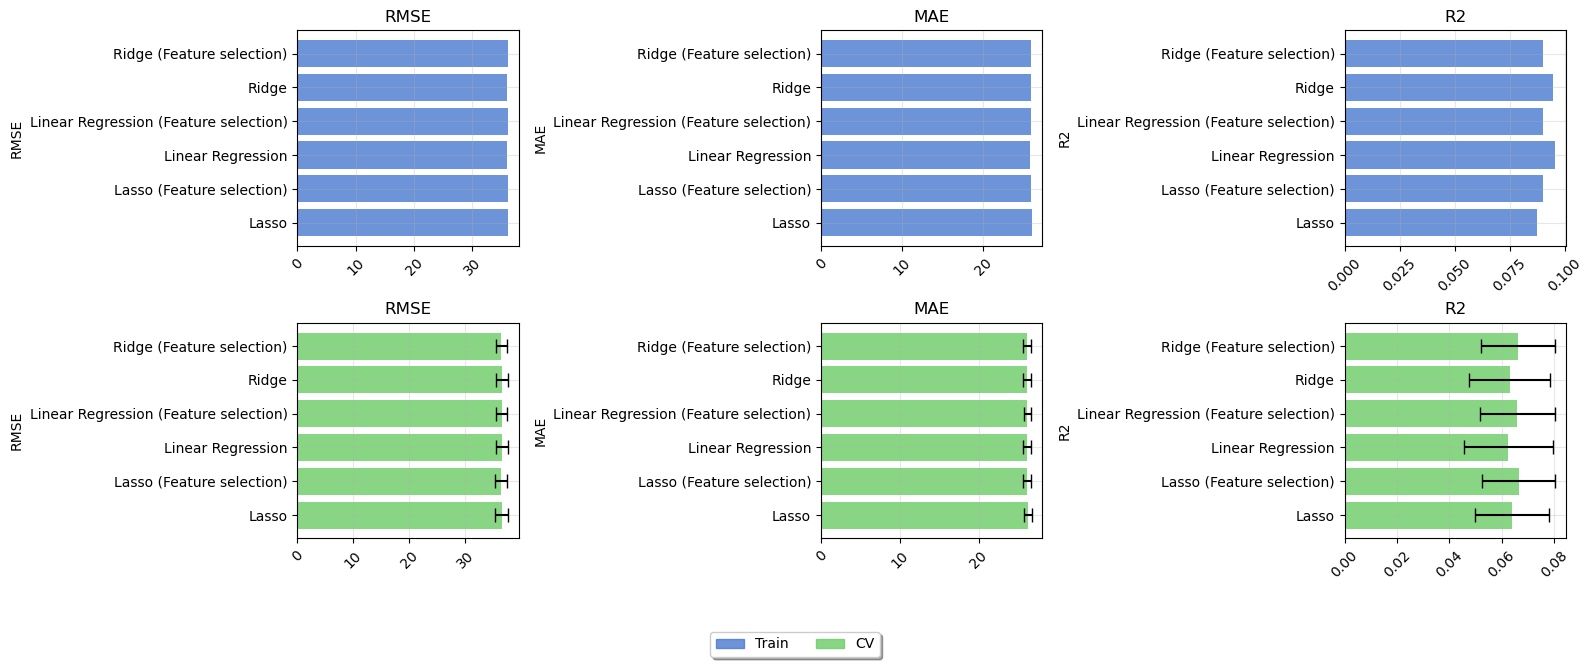

In [539]:
visualize_results(results)

Ähnlichkeit in den Ergebnissen tritt auf, wenn die zugrundeliegenden Daten und das Modell ähnliche Muster zeigen oder Annahmen machen (z.B. lineare Beziehung), sodass die Modelle ähnliche Fehler machen. Da unsere Daten Ausreisser enthalten und die Verteilung stark verzerrt ist, wollen wir nun robustere Modelle wie Random Forests und Boosting-Modelle (XGBosst verwenden).

In [540]:
# Sort results by cross-validation MSE
cv_results = results.loc[results["CV_Train"] == "CV", ["Model", "RMSE", "RMSE (SD)", "MAE", "MAE (SD)", "R2", "R2 (SD)"]]
cv_results.sort_values(by="RMSE", ascending=True)

Model       RMSE  RMSE (SD)        MAE  \
0              Lasso (Feature selection)  36.478886   1.066483  26.171734   
0              Ridge (Feature selection)  36.482949   1.053893  26.173142   
0  Linear Regression (Feature selection)  36.488585   1.037954  26.174427   
0                                  Lasso  36.532412   1.138418  26.224900   
0                                  Ridge  36.548406   1.096235  26.180372   
0                      Linear Regression  36.556092   1.083588  26.184047   

   MAE (SD)        R2   R2 (SD)  
0  0.489665  0.066534  0.013984  
0  0.484211  0.066304  0.014200  
0  0.472266  0.065991  0.014228  
0  0.525890  0.063903  0.014003  
0  0.508281  0.062993  0.015563  
0  0.515306  0.062557  0.016870

Hier die Modelle nach CV-Score nochmals sortiert.

## 3.1.3 RandomForestRegressor

Der **RandomForestClassifier** ist ein Ensemble-Lernverfahren, das eine grosse Anzahl von Entscheidungsbäumen trainiert und die Vorhersagen der einzelnen Bäume kombiniert. Jeder Baum wird auf einer zufälligen Stichprobe von Trainingsdaten mit einer zufälligen Auswahl von Merkmalen aufgebaut, was eine Überanpassung reduziert und das Modell robuster macht.

**Vorteile:**
+ Nicht-lineare Beziehungen: Kann komplexe, nicht lineare Beziehungen zwischen Merkmalen modellieren.
+ Handhabung von unausgewogenen Datensätzen: Es kann gut mit unausgewogenen Datensätzen umgehen.

**Nachteile:**

+ Interpretierbarkeit: Das Modell ist weniger interpretierbar als die logistische Regression, da es auf einer grossen Anzahl von Bäumen basiert.
+ Berechnungsintensiv: Random Forests sind speicher- und rechenintensiv, insbesondere bei einer grossen Anzahl von Bäumen oder Merkmalen.
+ Langsame Vorhersagen: Die Vorhersagegeschwindigkeit kann bei sehr grossen Datensätzen oder vielen Bäumen leiden.


Wir werden wieder wie zuvor zunächst ein RandomizedSearchCV durchführen und mit BayesSearchCV die Ergebnisse noch etwas erhöhen zu versuchen.

In [551]:
X_train_processed

DISTANCE  SCHEDULED_DEPARTURE_DATETIME_tmpc  \
0    -0.295303                           0.511833   
1    -0.565404                          -0.428915   
2    -0.758034                          -1.605061   
3     1.291801                          -0.381496   
4    -0.565404                          -1.181683   
...        ...                                ...   
5255 -1.606026                           0.323853   
5256 -0.565404                           0.502519   
5257 -0.240864                           1.735398   
5258 -0.420932                           1.499999   
5259 -0.504684                           1.358591   

      SCHEDULED_DEPARTURE_DATETIME_sped  SCHEDULED_DEPARTURE_DATETIME_p01m  \
0                             -0.047199                          -0.100724   
1                             -1.640107                          -0.100724   
2                             -0.274757                          -0.100724   
3                              0.180359                          -0.100724   
4                             -1.640107                          -0.100724   
...                                 ...                                ...   
5255                           0.863034                          -0.100724   
5256                           0.635476                          -0.100724   
5257                           0.180359                          -0.100724   
5258                          -0.957432                          -0.100724   
5259                           0.407918                          -0.100724   

      SCHEDULED_DEPARTURE_DATETIME_vsby  departure_6hr_before_tmpc  \
0                              0.297646                   0.401165   
1                              0.297646                  -0.234251   
2                              0.297646                  -1.554367   
3                              0.297646                  -0.429628   
4                             -1.362988                  -1.016640   
...                                 ...                        ...   
5255                           0.297646                   0.108099   
5256                          -0.255899                   0.108099   
5257                           0.297646                   1.378930   
5258                           0.297646                   1.330526   
5259                           0.297646                   1.770565   

      departure_6hr_before_sped  departure_6hr_before_p01m  \
0                      0.823124                  -0.100020   
1                     -0.589903                  -0.100020   
2                     -0.118894                  -0.100020   
3                     -0.825407                  -0.100020   
4                     -1.531921                  -0.099715   
...                         ...                        ...   
5255                  -0.589903                  -0.100020   
5256                  -0.118894                  -0.100020   
5257                  -0.118894                  -0.100020   
5258                  -0.118894                  -0.100020   
5259                  -0.118894                  -0.100020   

      departure_6hr_before_vsby  departure_1hr_before_tmpc  ...  \
0                      0.302086                   0.528661  ...   
1                      0.302086                  -0.414223  ...   
2                      0.302086                  -1.593041  ...   
3                      0.302086                  -0.555953  ...   
4                     -4.359664                  -1.074497  ...   
...                         ...                        ...  ...   
5255                   0.302086                   0.246050  ...   
5256                   0.302086                   0.292728  ...   
5257                   0.302086                   1.707479  ...   
5258                   0.302086                   1.330665  ...   
5259                   0.302086                   1.519072  ...   

      Origin_AIRPORT_San Francisco Intern

In [544]:
results2 = pd.DataFrame({"Model": [], "Train_CV": [], "RMSE": [], "MAE": [], "R2": []})

In [542]:
# Definiere den Hyperparameter-Suchraum
param_dist = {
    'n_estimators': [300, 350, 400, 500, 550, 600],  # Ganzzahliger Bereich
    'max_depth': [5, 7, 11, 14, 17, 20, 23, 27, 30],         # Ganzzahliger Bereich
    'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20], # Ganzzahliger Bereich
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Ganzzahliger Bereich
    'max_features': ['sqrt', 'log2', 0.2, 0.25, 0.3, 0.35, 0.4, 0.45,  None],  # sqrt = 9, log2 = 6, 0.2 = 14, 0.25=18, 0.3=22, 0.4=29, 0.5=36, 0.6=43
    'bootstrap': [True, False],   # Kategorisch
}

# Erstelle das Modell
rf = RandomForestRegressor(random_state=42)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,  # Anzahl der Iterationen
    scoring="neg_root_mean_squared_error",  # RMSE als Bewertungsmaßstab
    cv=cv, # K-Fold-Cross-Validation
    n_jobs=2,
    verbose=2,
    random_state=42
)

# Training
random_search.fit(X_train_processed, y_train)

# Ergebnisse
print("Beste Hyperparameter:", random_search.best_params_)
print("Niedrigstes RMSE:", -random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=  16.1s
[CV] END bootstrap=True, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=  16.2s
[CV] END bootstrap=True, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=  16.4s
[CV] END bootstrap=True, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=  16.4s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=400; total time=   1.1s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=400; total time=   1.2s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=400; total t

Beste Hyperparameter: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Niedrigstes RMSE: 35.22864985140328

In [ ]:
# convert results into a dataframe
results_rf = pd.DataFrame(random_search.cv_results_)

# sort results by the mean test score
sorted_results = results_rf.sort_values(by='mean_test_score', ascending=False)

# take the top 3 results
top_3 = sorted_results.head(3)

# print these parameters and results
print("Beste 3 Hyperparameterkombinationen:")
for i, row in top_3.iterrows():
    print(f"Hyperparameter: {row['params']}")
    print(f"Mean Test Score: {row['mean_test_score']}")
    print()

Beste 3 Hyperparameterkombinationen:
Hyperparameter: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Mean Test Score: -35.22864985140328

Hyperparameter: {'n_estimators': 600, 'min_samples_split': 18, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Mean Test Score: -35.23217316308569

Hyperparameter: {'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 0.2, 'max_depth': 20, 'bootstrap': False}
Mean Test Score: -35.2434192326781



Die RandomizedSearchCV half uns, eine grobe Tendenz zu erhalten, in welcher Richtung sich eine mögliche "optimale" Hyperparameterkombination befinden könnten. Mit Hilfe von BayesSearchCV können wir nun einen Parameterraum aufstellen, damit wir hoffentlich das Resultat noch etwas optimieren können.

Zusammengefasst nochmal die Ergebnisse der RSCV in einer Tabelle:

|Method|n_estimators|min_samples_split|min_samples_leaf|max_features|max_depth|bootstrap
|--|--|--|--|--|--|--|
|RSCV 1.1|500|10|5|sqrt|30|False|
|RSCV 1.2|600|18|5|sqrt|30|False|
|RSCV 1.3|600|10|7|0.2|20|False|
|**Resulting range**|480-620|6-18|3-8|sqrt, 0.2|15-30|True, False|

In [545]:
# Beste Hyperparameter aus RandomizedSearchCV
best_params = {
    'bootstrap': False,
    'max_depth': 30,
    'max_features': 'sqrt',
    'min_samples_leaf': 5,
    'min_samples_split': 10,
    'n_estimators': 500
}

# Definiere das Random-Forest-Modell mit den besten Hyperparametern
rf_model_best = RandomForestRegressor(
    random_state=42,  # Gleicher Zufallszustand für Reproduzierbarkeit
    **best_params  # Füge die besten Hyperparameter hinzu
)

In [546]:
rf_model1_scores = compute_metrics(rf_model_best, X_train_processed, y_train, scorer=scorer, model_name="Random Forest 1 (RandomizedSearchCV)")

In [547]:
results2 = pd.concat([results2, rf_model1_scores], axis=0)

In [548]:
results2

Model  Train_CV       RMSE        MAE  \
0  Random Forest 1 (RandomizedSearchCV)       NaN -22.976636 -15.822376   
0  Random Forest 1 (RandomizedSearchCV)       NaN -35.119566 -25.039248   

         R2 CV_Train  RMSE (SD)  MAE (SD)  R2 (SD)  
0  0.630749    Train        NaN       NaN      NaN  
0  0.134889       CV   1.066482  0.576746  0.01071

Wir konnten den RMSE nun wieder auf 35.1 Minuten reduzieren, was doch nochmals eine Verbesserung darstellt.

In [552]:
# Definiere den Hyperparameter-Suchraum
param_space = {
    'n_estimators': (480, 620),  # Ganzzahliger Bereich
    'max_depth': (15, 30),         # Ganzzahliger Bereich
    'min_samples_split': (6, 18), # Ganzzahliger Bereich
    'min_samples_leaf': (3, 8),  # Ganzzahliger Bereich
    'max_features': ['sqrt', 0.2, 0.3],  # Kategorisch
    'bootstrap': [True, False],   # Kategorisch
}

# Erstelle das Modell
rf = RandomForestRegressor(random_state=42)

# BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=rf,
    search_spaces=param_space,
    n_iter=80,  # Anzahl der Iterationen
    scoring="neg_root_mean_squared_error",  # RMSE als Bewertungsmaßstab
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=2,
    verbose=2,
    random_state=42
)

# Training
bayes_search.fit(X_train_processed, y_train)

# Ergebnisse
print("Beste Hyperparameter:", bayes_search.best_params_)
print("Niedrigstes RMSE:", -bayes_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=True, max_depth=26, max_features=0.3, min_samples_leaf=5, min_samples_split=14, n_estimators=538; total time=   7.8s
[CV] END bootstrap=True, max_depth=26, max_features=0.3, min_samples_leaf=5, min_samples_split=14, n_estimators=538; total time=   7.9s
[CV] END bootstrap=True, max_depth=26, max_features=0.3, min_samples_leaf=5, min_samples_split=14, n_estimators=538; total time=   7.9s
[CV] END bootstrap=True, max_depth=26, max_features=0.3, min_samples_leaf=5, min_samples_split=14, n_estimators=538; total time=   8.1s
[CV] END bootstrap=True, max_depth=26, max_features=0.3, min_samples_leaf=5, min_samples_split=14, n_estimators=538; total time=   7.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=28, max_features=sqrt, min_samples_leaf=8, min_samples_split=16, n_estimators=489; total time=   4.4s
[CV] END bootstrap=False, max_depth=28, max_features=sqrt, min_s

Beste Hyperparameter: OrderedDict({'bootstrap': False, 'max_depth': 24, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 620})
Niedrigstes RMSE: 35.14909651770451

In [553]:
# convert results into a dataframe
results_rf = pd.DataFrame(bayes_search.cv_results_)

# sort results by the mean test score
sorted_results = results_rf.sort_values(by='mean_test_score', ascending=False)

# take the top 3 results
top_3 = sorted_results.head(3)

# print these parameters and results
print("Beste 3 Hyperparameterkombinationen:")
for i, row in top_3.iterrows():
    print(f"Hyperparameter: {row['params']}")
    print(f"Mean Test Score: {row['mean_test_score']}")
    print()

Beste 3 Hyperparameterkombinationen:
Hyperparameter: OrderedDict({'bootstrap': False, 'max_depth': 24, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 620})
Mean Test Score: -35.14909651770451

Hyperparameter: OrderedDict({'bootstrap': False, 'max_depth': 24, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 607})
Mean Test Score: -35.14988314548001

Hyperparameter: OrderedDict({'bootstrap': False, 'max_depth': 24, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 608})
Mean Test Score: -35.150301789722434



Beste 3 Hyperparameterkombinationen:
Hyperparameter: OrderedDict({'bootstrap': False, 'max_depth': 24, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 620})
Mean Test Score: -35.14909651770451

Hyperparameter: OrderedDict({'bootstrap': False, 'max_depth': 24, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 607})
Mean Test Score: -35.14988314548001

Hyperparameter: OrderedDict({'bootstrap': False, 'max_depth': 24, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 608})
Mean Test Score: -35.150301789722434

Wir können nun das beste Modell aufstellen und die Ergebnisse berechnen.

In [554]:
# Beste Hyperparameter aus BayesSearchCV
best_params2 = {
    'bootstrap': False,
    'max_depth': 24,
    'max_features': 'sqrt',
    'min_samples_leaf': 4,
    'min_samples_split': 6,
    'n_estimators': 620
}

# Definiere das Random-Forest-Modell mit den besten Hyperparametern
rf_model_best2 = RandomForestRegressor(
    random_state=42,  # Gleicher Zufallszustand für Reproduzierbarkeit
    **best_params2  # Füge die besten Hyperparameter hinzu
)

In [555]:
rf_model2_scores = compute_metrics(rf_model_best2, X_train_processed, y_train, scorer=scorer, model_name="Random Forest 2 (BayesSearchCV)")

In [556]:
results2 = pd.concat([results2, rf_model2_scores], axis=0)

In [557]:
results2

Model  Train_CV       RMSE        MAE  \
0  Random Forest 1 (RandomizedSearchCV)       NaN -22.976636 -15.822376   
0  Random Forest 1 (RandomizedSearchCV)       NaN -35.119566 -25.039248   
0       Random Forest 2 (BayesSearchCV)       NaN -21.824750 -14.958414   
0       Random Forest 2 (BayesSearchCV)       NaN -35.102498 -25.040449   

         R2 CV_Train  RMSE (SD)  MAE (SD)   R2 (SD)  
0  0.630749    Train        NaN       NaN       NaN  
0  0.134889       CV   1.066482  0.576746  0.010710  
0  0.666845    Train        NaN       NaN       NaN  
0  0.135735       CV   1.066217  0.580335  0.010456

BayesSearch half uns, den RMSE minimal zu reduzieren.

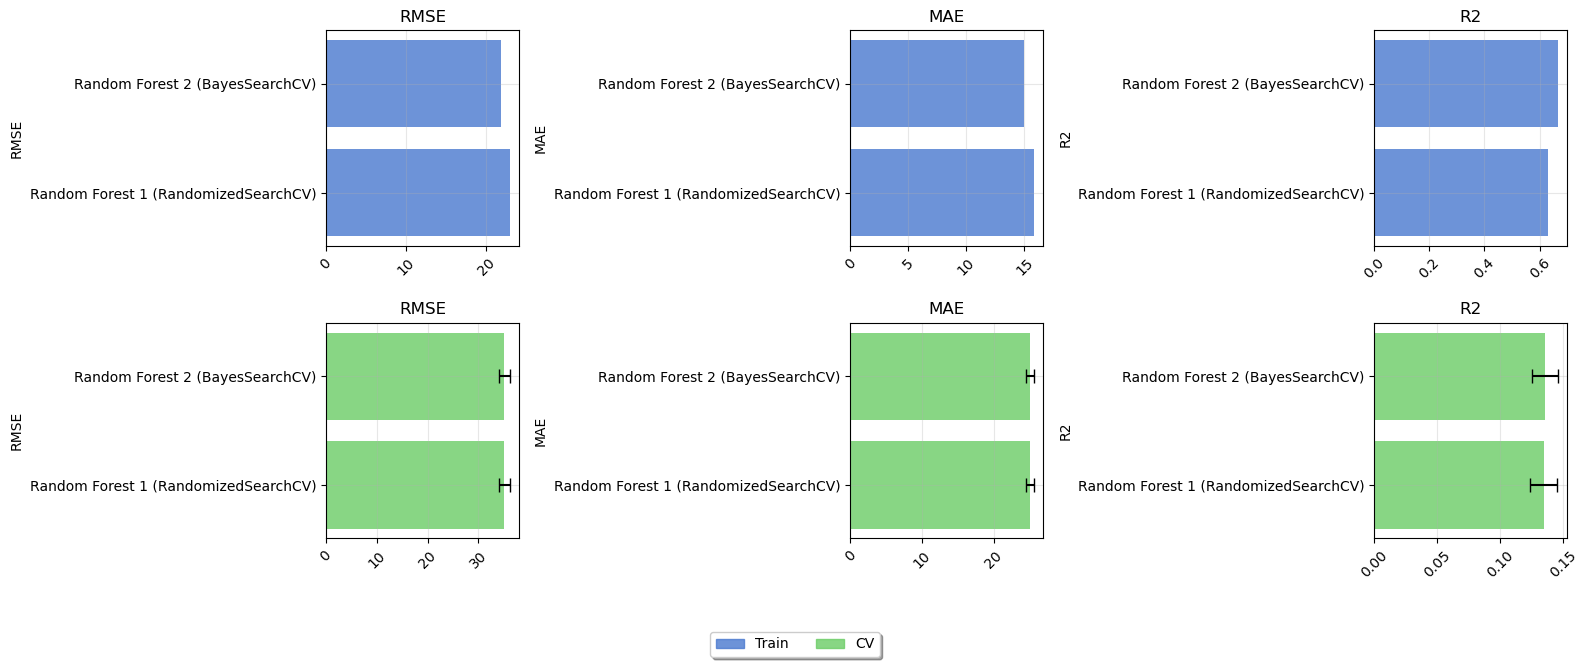

In [558]:
visualize_results(results2)

Mit der BayesSearchCV konnten wir unser CV-Ergebnis nochmals leicht verbessern.

## 3.1.4 XGBRegressor

### RandomizedSearchCV

*Bermerkung:* Die RandomizedSearchCV wurde auf Google Colab durchgeführt. Deswegen werden unten nur die Ergebnisse in einem Markdown-Feld eingefügt.

In [559]:
# Definiere den RMSE-Score als Bewertungsmetrik
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Verwende RMSE als Scorer für GridSearchCV
rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [ ]:
# Definiere den Hyperparameter-Raum (Parameter Grid)
param_dist = {
    'n_estimators': [450, 500, 550, 600, 650, 700, 800],
    'max_depth': [4, 6, 7, 8, 9, 10, 12, 16, 20],
    'learning_rate': [0.01, 0.04, 0.07, 0.1, 0.125, 0.15, 0.2],
    'subsample': [0.6, 0.65, 0.675, 0.7, 0.75, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.625, 0.65, 0.675, 0.7, 0.8, 0.9],
    'gamma': [0, 0.01, 0.025, 0.05, 0.1],
    'reg_alpha': [0.025, 0.05, 0.1, 0.2, 0.3],
    'reg_lambda': [0.2, 0.4, 0.7, 1, 1.2, 1.5,2],
    'min_child_weight': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# Make our CV to select the best alpha on each model
cv = KFold(n_splits=5, shuffle=True, random_state=72)

# Definiere das XGBoost-Modell
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)


# Definiere die RandomizedSearchCV mit Cross-Validation
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=100,  # Anzahl der zufälligen Kombinationen, die ausprobiert werden
    scoring=rmse_scorer,  # Verlustfunktion: Wir wollen den MSE minimieren
    cv=cv,  # 5-fache Cross-Validation
    verbose=2,  # Ausgabe von Fortschrittsinformationen
    random_state=42,  # Zufallszustand für Reproduzierbarkeit
    n_jobs=1
)

# Trainiere das Modell mit RandomizedSearchCV
random_search.fit(X_train_processed, y_train)

# Zeige die besten Hyperparameter
print(f"Beste Hyperparameter: {random_search.best_params_}")
print("Niedrigstes RMSE:", -random_search.best_score_)

Beste Hyperparameter: {'subsample': 0.7, 'reg_lambda': 1.5, 'reg_alpha': 0.1, 'n_estimators': 500, 'min_child_weight': 10, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.05, 'colsample_bytree': 0.6}
Niedrigstes RMSE: 35.18530542776328

In [ ]:
# convert results into a dataframe
results_rf = pd.DataFrame(random_search.cv_results_)

# sort results by the mean test score
sorted_results = results_rf.sort_values(by='mean_test_score', ascending=False)

# take the top 3 results
top_3 = sorted_results.head(3)

# print these parameters and results
print("Beste 3 Hyperparameterkombinationen:")
for i, row in top_3.iterrows():
    print(f"Hyperparameter: {row['params']}")
    print(f"Mean Test Score: {row['mean_test_score']}")
    print()

Beste 3 Hyperparameterkombinationen:
Hyperparameter: {'subsample': 0.7, 'reg_lambda': 1.5, 'reg_alpha': 0.1, 'n_estimators': 500, 'min_child_weight': 10, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.05, 'colsample_bytree': 0.6}
Mean Test Score: -35.18530542776328

Hyperparameter: {'subsample': 0.75, 'reg_lambda': 2, 'reg_alpha': 0.025, 'n_estimators': 800, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.01, 'colsample_bytree': 0.675}
Mean Test Score: -35.19441375515111

Hyperparameter: {'subsample': 0.7, 'reg_lambda': 1.5, 'reg_alpha': 0.2, 'n_estimators': 700, 'min_child_weight': 4, 'max_depth': 9, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.6}
Mean Test Score: -35.198496897980114

|Method|subsample|reg_lambda|reg_alpha|n_estimators|min_child_weight|max_depth|learning_rate|gamme|colsample_bytree|
|--|--|--|--|--|--|--|--|--|--|
|RSCV 1.1|0.7|1.5|0.1|500|10|7|0.01|0.05|0.6|
|RSCV 1.2|0.75|2|0.025|800|5|7|0.01|0.01|0.675|
|RSCV 1.3|0.7|1.5|0.2|700|4|9|0.01|0.1|0.6|
|Resulting range|0.65-0.8|1.5-2|0.02-0.2|500-800|4-10|6-10|0.002-0.06|0.01-0.1|0.58-0.7|

In [562]:
# Beste Hyperparameter aus RandomizedSearchCV
best_params1 = {
    'subsample': 0.7,
    'reg_lambda': 1.5,
    'reg_alpha': 0.1,
    'n_estimators':500,
    'min_child_weight': 10,
    'max_depth': 7,
    'learning_rate': 0.01,
    'gamma': 0.05,
    'colsample_bytree': 0.6
}


# Definiere das XGBoost-Modell mit den besten Hyperparametern
xgb_model_best1 = xgb.XGBRegressor(
    objective='reg:squarederror', 
    random_state=42,
    **best_params1  # Füge die besten Hyperparameter hinzu
)

In [563]:
xgb1_scores = compute_metrics(xgb_model_best1, X_train_processed, y_train, scorer=scorer, model_name="XGBoost (RSCV)")

In [564]:
results2 = pd.concat([results2, xgb1_scores], axis=0)

In [565]:
results2

Model  Train_CV       RMSE        MAE  \
0  Random Forest 1 (RandomizedSearchCV)       NaN  22.976636  15.822376   
0  Random Forest 1 (RandomizedSearchCV)       NaN  35.119566  25.039248   
0       Random Forest 2 (BayesSearchCV)       NaN  21.824750  14.958414   
0       Random Forest 2 (BayesSearchCV)       NaN  35.102498  25.040449   
0                        XGBoost (RSCV)       NaN -28.716205 -20.446373   
0                        XGBoost (RSCV)       NaN -35.106350 -25.069086   

         R2 CV_Train  RMSE (SD)  MAE (SD)   R2 (SD)  
0  0.630749    Train        NaN       NaN       NaN  
0  0.134889       CV   1.066482  0.576746  0.010710  
0  0.666845    Train        NaN       NaN       NaN  
0  0.135735       CV   1.066217  0.580335  0.010456  
0  0.423230    Train        NaN       NaN       NaN  
0  0.135418       CV   1.007277  0.551452  0.013478

### BayesSearchCV

In [567]:
# Definiere den Hyperparameter-Suchraum
param_space = {
    "subsample": Real(0.65, 0.8, prior="uniform"),          # subsample ratio of training instances
    "reg_lambda": Real(1.5, 2, prior="uniform"),            # L2 regularization term
    "reg_alpha": Real(0.02, 0.2, prior="log-uniform"),     # L1 regularization term
    "n_estimators": Integer(500, 800),                      # number of boosting rounds
    "min_child_weight": Integer(4, 10),                     # minimum sum of instance weight
    "max_depth": Integer(6, 10),                            # maximum depth of a tree
    "learning_rate": Real(0.002, 0.06, prior="log-uniform"), # learning rate (eta)
    "gamma": Real(0.01, 0.1, prior="uniform"),              # minimum loss reduction
    "colsample_bytree": Real(0.58, 0.7, prior="uniform")    # subsample ratio of columns when constructing each tree
}


# K-Fold Cross-Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Erstelle das XGBoost-Modell
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=xgb_model,
    search_spaces=param_space,
    n_iter=120,  # Anzahl der Iterationen
    scoring=rmse_scorer,  # RMSE als Bewertungsmaßstab
    cv=cv,
    n_jobs=1,
    verbose=2,
    random_state=42
)

# Training
bayes_search.fit(X_train_processed, y_train)

# Ergebnisse
print("Beste Hyperparameter:", bayes_search.best_params_)
print("Niedrigstes RMSE:", -bayes_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END colsample_bytree=0.6292124750623976, gamma=0.07549531688595926, learning_rate=0.047751733774329584, max_depth=7, min_child_weight=8, n_estimators=624, reg_alpha=0.044870543557097915, reg_lambda=1.8697521170952103, subsample=0.695669496655476; total time=   3.0s
[CV] END colsample_bytree=0.6292124750623976, gamma=0.07549531688595926, learning_rate=0.047751733774329584, max_depth=7, min_child_weight=8, n_estimators=624, reg_alpha=0.044870543557097915, reg_lambda=1.8697521170952103, subsample=0.695669496655476; total time=   2.1s
[CV] END colsample_bytree=0.6292124750623976, gamma=0.07549531688595926, learning_rate=0.047751733774329584, max_depth=7, min_child_weight=8, n_estimators=624, reg_alpha=0.044870543557097915, reg_lambda=1.8697521170952103, subsample=0.695669496655476; total time=   2.6s
[CV] END colsample_bytree=0.6292124750623976, gamma=0.07549531688595926, learning_rate=0.047751733774329584, max_depth=7, min_ch

Beste Hyperparameter: OrderedDict({'colsample_bytree': 0.58, 'gamma': 0.1, 'learning_rate': 0.005505303277813933, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 800, 'reg_alpha': 0.2, 'reg_lambda': 1.5, 'subsample': 0.65})
Niedrigstes RMSE: 35.24946125680193

In [568]:
# convert results into a dataframe
results_rf = pd.DataFrame(bayes_search.cv_results_)

# sort results by the mean test score
sorted_results = results_rf.sort_values(by='mean_test_score', ascending=False)

# take the top 3 results
top_3 = sorted_results.head(3)

# print these parameters and results
print("Beste 3 Hyperparameterkombinationen:")
for i, row in top_3.iterrows():
    print(f"Hyperparameter: {row['params']}")
    print(f"Mean Test Score: {row['mean_test_score']}")
    print()

Beste 3 Hyperparameterkombinationen:
Hyperparameter: OrderedDict({'colsample_bytree': 0.58, 'gamma': 0.1, 'learning_rate': 0.005505303277813933, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 800, 'reg_alpha': 0.2, 'reg_lambda': 1.5, 'subsample': 0.65})
Mean Test Score: -35.24946125680193

Hyperparameter: OrderedDict({'colsample_bytree': 0.58, 'gamma': 0.1, 'learning_rate': 0.005278613671331197, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 800, 'reg_alpha': 0.2, 'reg_lambda': 1.5, 'subsample': 0.65})
Mean Test Score: -35.25319314082564

Hyperparameter: OrderedDict({'colsample_bytree': 0.58, 'gamma': 0.1, 'learning_rate': 0.005602294889480563, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 800, 'reg_alpha': 0.2, 'reg_lambda': 2.0, 'subsample': 0.65})
Mean Test Score: -35.25481204995883



Beste 3 Hyperparameterkombinationen:
Hyperparameter: OrderedDict({'colsample_bytree': 0.58, 'gamma': 0.1, 'learning_rate': 0.005505303277813933, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 800, 'reg_alpha': 0.2, 'reg_lambda': 1.5, 'subsample': 0.65})
Mean Test Score: -35.24946125680193

Hyperparameter: OrderedDict({'colsample_bytree': 0.58, 'gamma': 0.1, 'learning_rate': 0.005278613671331197, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 800, 'reg_alpha': 0.2, 'reg_lambda': 1.5, 'subsample': 0.65})
Mean Test Score: -35.25319314082564

Hyperparameter: OrderedDict({'colsample_bytree': 0.58, 'gamma': 0.1, 'learning_rate': 0.005602294889480563, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 800, 'reg_alpha': 0.2, 'reg_lambda': 2.0, 'subsample': 0.65})
Mean Test Score: -35.25481204995883


In [569]:
#Beste Hyperparameter aus BayesSearchCV
best_params2 = {
    'subsample': 0.65,
    'reg_lambda': 1.5,
    'reg_alpha': 0.2,
    'n_estimators':800,
    'min_child_weight': 4,
    'max_depth': 8,
    'learning_rate': 0.005505303277813933,
    'gamma': 0.1,
    'colsample_bytree': 0.58
}


# Definiere das XGBoost-Modell mit den besten Hyperparametern
xgb_model_best2 = xgb.XGBRegressor(
    objective='reg:squarederror', 
    random_state=42,
    **best_params2  # Füge die besten Hyperparameter hinzu
)

In [570]:
xgb2_scores = compute_metrics(xgb_model_best2, X_train_processed, y_train, scorer=scorer, model_name="XGBoost (BSCV)")

In [571]:
results2 = pd.concat([results2, xgb2_scores], axis=0)

In [572]:
results2

Model  Train_CV       RMSE        MAE  \
0  Random Forest 1 (RandomizedSearchCV)       NaN  22.976636  15.822376   
0  Random Forest 1 (RandomizedSearchCV)       NaN  35.119566  25.039248   
0       Random Forest 2 (BayesSearchCV)       NaN  21.824750  14.958414   
0       Random Forest 2 (BayesSearchCV)       NaN  35.102498  25.040449   
0                        XGBoost (RSCV)       NaN -28.716205 -20.446373   
0                        XGBoost (RSCV)       NaN -35.106350 -25.069086   
0                        XGBoost (BSCV)       NaN -26.441166 -18.760703   
0                        XGBoost (BSCV)       NaN -35.083122 -25.038039   

         R2 CV_Train  RMSE (SD)  MAE (SD)   R2 (SD)  
0  0.630749    Train        NaN       NaN       NaN  
0  0.134889       CV   1.066482  0.576746  0.010710  
0  0.666845    Train        NaN       NaN       NaN  
0  0.135735       CV   1.066217  0.580335  0.010456  
0  0.423230    Train        NaN       NaN       NaN  
0  0.135418       CV   1.007277  0.551452  0.013478  
0  0.510999    Train        NaN       NaN       NaN  
0  0.136563       CV   1.037616  0.562333  0.015944

In [575]:
# Sort results by cross-validation MSE
cv_results2 = results2.loc[results2["CV_Train"] == "CV", ["Model", "RMSE", "RMSE (SD)", "MAE", "MAE (SD)", "R2", "R2 (SD)"]]
cv_results2.sort_values(by="RMSE", ascending=True)

Model       RMSE  RMSE (SD)        MAE  \
0                        XGBoost (RSCV) -35.106350   1.007277 -25.069086   
0                        XGBoost (BSCV) -35.083122   1.037616 -25.038039   
0       Random Forest 2 (BayesSearchCV)  35.102498   1.066217  25.040449   
0  Random Forest 1 (RandomizedSearchCV)  35.119566   1.066482  25.039248   

   MAE (SD)        R2   R2 (SD)  
0  0.551452  0.135418  0.013478  
0  0.562333  0.136563  0.015944  
0  0.580335  0.135735  0.010456  
0  0.576746  0.134889  0.010710

Mit dem XGBRegressor erzielten wir nochmals leicht einen besseren RMSE. Dies ist erfreulich, jedoch bleibt der RMSE sehr hoch...

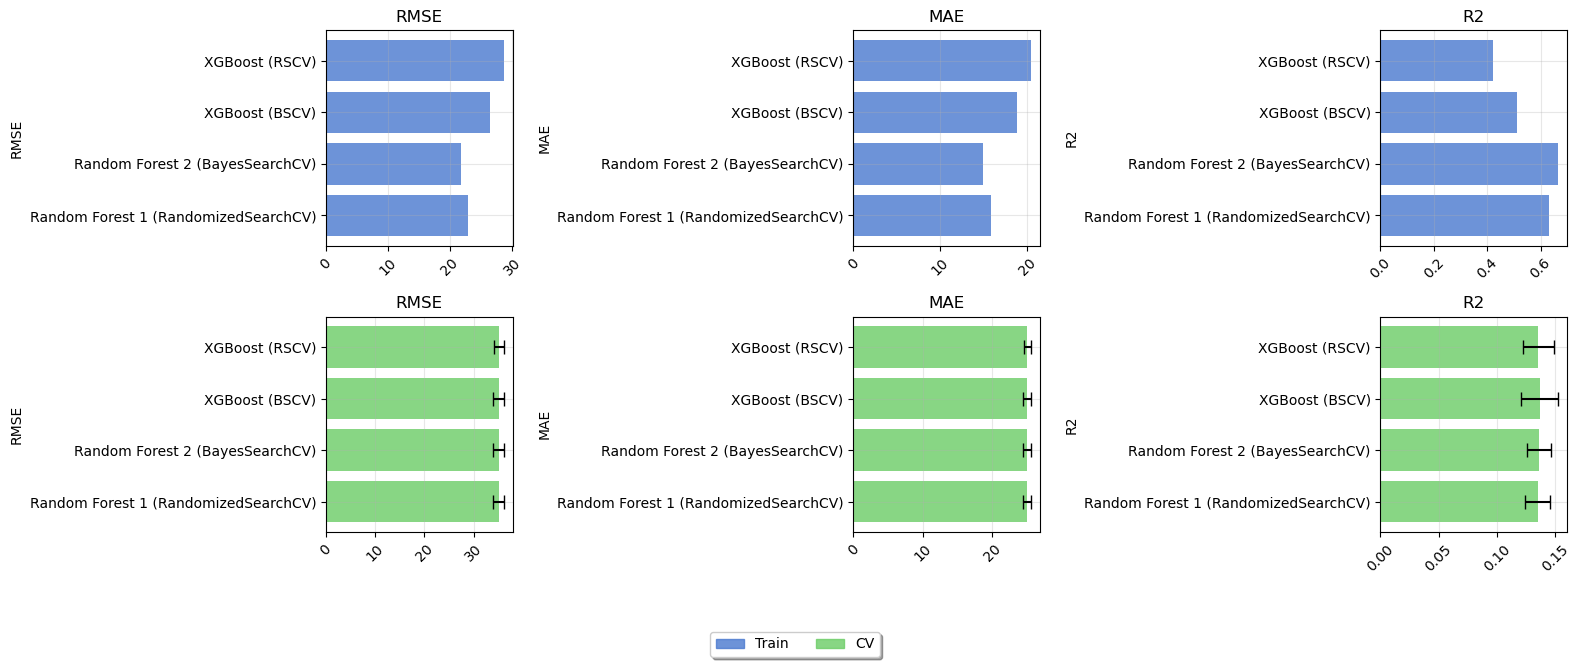

In [576]:
visualize_results(results2)

In [586]:
y_pred_test = xgb_model_best2.predict(X_test_processed)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(rmse)


35.09469745737216


Wir können bestätigen, dass unser finales Model xgb_model_best2 auch auf den Testdaten ähnlich performt.

# 4. Interpretation der Ergebnisse unter Berücksichtigung der Verteilung der Zielvariable

Wir haben uns die Verteilung des Labels für die Verwendung der letzten Modelle genau angeschaut. Dabei haben wir die extremen Ausreisse (dh. Verspätungen über 200 Minuten, was 3h20min entspricht) ignoriert. Dies können wir damit Begründen, dass unser Streamlit-Applikation primär den Fluggästen dienen sollte. Es soll den Fluggästen zeigen, wie gross ihre wetterbedingte Flugverspätung sein werden könnte (Annahme aufgrund unseres Datasets: es gibt eines wetterbedingte Flugverspätung). Da rund 75% der wetterbedingten Flugverspätungen weniger als 50min betragen, geht es also vor allem darum, kürzere Flugverspätungen korrekt vorherzusagen, um möglichst für viele Fluggäste eine nützliche Applikation z.V. zu stellen. Wir sind uns bewusst, dass das Weglassen von Ausreissern keine saubere Lösung darstellt. Durch das Weglassen von diesen 178 Flügen mit extremen Flugverspätung konnten wir jedoch unsere Scores erheblich steigern (RMSE von rund 65 Minuten auf 35 Minuten) und das Modell so gestalten, dass es besonders für die Mehrzahl der wetterbedingten Flugverspätungen einigermassen moderate Ergebnisse liefert. Dies ändert zwar nichts daran, dass das Modell "besser" ist, da wir nach wie vor grosse Verspätungen schlechte vorhersagen können. Wäre unsere Zielgruppe Airlines oder Flughäfen gewesen, dann würden insbesondere auch diese Ausreisser von erheblicher Bedeutung sein, da höhere Verspätungen mit höheren Mehrkosten verbunden sind. Und wenn das Ziel eben darin gelegen hätte, grosse Verspätungen (z.B. über 100 Minuten) präzise vorherzusagen, wäre die Genauigkeit des Modells unzureichend, da es offenbar diese Ausreisser nicht gut erfasst.

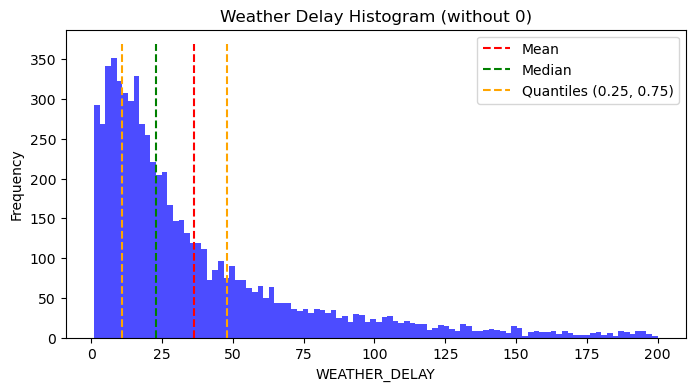

|Ohne Ausreisser|Mit Ausreisser|                            
|--|--|                                                    
|count    6576.000000    |count    6754.000000|            
|mean       36.450730    |mean       43.992449|                 
|std        37.768227    |std        63.294154|            
|min         1.000000    |min         1.000000|
|25%        11.000000    |25%        11.000000|
|50%        23.000000    |50%        24.000000|
|75%        48.000000    |75%        52.000000|
|max       200.000000    |max       991.000000|

**Modell XGB (BSCV)**

RMSE     :   35.083122

RMSE (SD):   1.037616

MAE      :   25.038039

MAE (SD) :   0.562333


Betrachten wir nun die Verteilung des Labels mit den Ergebnissen des Modells etwas genauer:

Der **RMSE** beträgt 35.08 Minuten, was bedeutet, dass die durchschnittliche Fehlergrösse (gewichtet nach grossen Abweichungen) etwa 35 Minuten beträgt. Verglichen mit der Verteilung der Zielvariable ist der RMSE fast identisch mit dem Mittelwert (36.45min). Das bedeutet, dass das Modell in Bezug auf die typischen Verspätungen arbeitet (also kleinere Verspätungen), aber grössere Fehler nicht optimal minimiert. Denn gemäss Formel vom RMSE werden grössere Fehler stärker gewichtet und erhöhen somit den RMSE stärker als kleine Fehler. Die **Standardabweichung der Zielvariable** beträgt 37.77 Minuten. Im Kontext der STD kann also festfehalten werden, das Modell es nicht schafft, den Fehler viel kleiner als die natürliche Streuung der Zielvariable zu machen. Für ein besseres Modell sollte der RMSE deutlich unter der Standardabweichung liegen. Würden wir eine Webapllikation für Airlines oder Flughäfen erstellen, wäre unser Modell demnach nicht geeignet, da besonders ein Mehrwert für Airlines oder Flughäfen entstünde, wenn grosse Verspätungen genau vorhergesagt werden könnten. Damit könnten gezielter Massnahmen im Vornherein gegen die wetterbedingten Verspätungen unternommen werden und mehr Ressourcen rechtzeitig am richtigen Ort zugeteilt werden.

Der **MAE** beträgt 25.04 Minuten, was bedeutet, dass das Modell im Durchschnitt um etwa 25 Minuten von den tatsächlichen Verspätungen abweicht, ohne grosse Fehler besonders zu gewichten. Dies ist nicht besonders ein zufriedenstellendes Ergebnis. Das bedeutet jedoch, dass die meisten Vorhersagen für typische Flüge im Bereich von ±25 Minuten liegen. Dies kann im Kontext des Medians beurteilt werden: wenn der MAE ähnlich wie der Median der Zielvariable (MAE: 25min vs. Median: 23min) ist, deutet das darauf hin, dass das Modell oft Vorhersagen trifft, die von der zentralen Tendenz der Zielvariable (also dem Median) abweichen. Beispielsweise könnte bei einem Flug mit einer tatsächlichen Verspätung von 20min, die Vorhersage zwischen keiner Verspätung und bis zu 55min Verspätung liegen. Ein nicht allzu zuverlässliches Resultat...

Positiv ist die **Standardabweichung der Vorhersagen** zwischen den CV-Folds zu werten. Beim RMSE bei rund 1min und beim MAE bei 0.5min hebt dies die Stablität und Konsistenz der Modells hervor. Es liefert unabhängig von den Datenaufteilungen ähnliche Vorhersagegenauigkeiten. Dies nützt allerdings nur wenig, wenn der RMSE und der MAE bei 35min bzw 25min liegen.

Zusammenfassend sind die Ergebnisse also, wenn überhaupt, "akzeptabel". Das Modell ist relativ genau für häufige oder typische Verspätungen, da der MAE (25 Minuten) unter dem Mittelwert (36 Minuten) liegt. Ein MAE ähnlich dem Median (23 Minuten) deutet darauf hin, dass für Flüge mit kleineren oder moderaten Verspätungen (bis etwa zum 50%-Quantil) die Vorhersagen in einem akzeptablen, aber nicht befriedigenden Bereich sind. Dennoch sind die Vorhersagen für extreme Verspätungen (z. B. >75%-Quantil oder Ausreisser) weniger genau, was durch den hohen RMSE im Vergleich zum Mean bestätigt wird. Für unsere Zielgruppe, Fluggäste, kann unsere Webapplikation also hilfreich sein, wenn auch nur begrenzt. Die Applikation könnte also als ein erstes Tool genutzt werden, welches den Fluggästen einen Hinweis auf wetterbedingte Verspätungen geben könnte und so das Planen nach dem der Ankunft etwas erleichtern. Jedoch in Situationen, in denen präzisere Vorhersagen erforderlich sind (z. B. Umsteigen bei kurzen Verbindungszeiten), ist die Applikation kaum brauchbar.

**Wie können wir Transparanz gegenüber den Nutzern schaffen?**

Angesichts dieses nicht sehr zufriedenstellenden Resultats haben wir uns beim Umsetzen der App schliesslich Gedanken gemacht, ob eine solche Webapplikation in der realen Welt tatsächlich von Nutzen ist. Wir kamen zum Schluss, dass solange der Nutzer nicht darüber informiert wird, wie "präzise" unsere Vorhersage ist, wir für Applikation keine Vertrauen vom Nutzer gewinnen könnten und die Applikation somit höchstwahrscheinlich nicht genutzt wird. Der Nutzer würde die Applikation 1-2 Mal brauchen und schnell feststellen, dass die Vorhersagen immer falsch oder zu ungenau sind. Als Lösung für dieses Problem wollten wir die Fähigkeit des Apps, wetterbedingte Flugverspätungen vorherzusagen, transparenter gestalten. Deswegen weisen wir bei der Prediction darauf hin, dass der mittlere Absolute Fehler 25 Minuten beträgt. Damit können wir dem Nutzer ein ungefähres Intervall angeben (y_pred-25min >= 0; y_pred+25min). Dies entspricht zwar keinem Konfidenzintervall mit einer entsprechenden Wahrscheinlichkeit, macht aber die Unsicherheit, die hinter unserem Modell steckt deutlich.

# 6. Fazit und was wir gelernt haben



Wir möchten im nachfolgenden Abschnitt nochmals ausführlicher über die kritischen Punkte unseres Projekts sprechen und hervorheben, was wir daraus für künftige Projekte herausnehmen.

Obwohl wir bereits einige solcher Machine Learning Projekte durchgeführt haben, war das vorliegende eher ein herausforderndes Projekt, welches auch teilweise frustierend war. Zu Beginn das Projekts fanden wir dieses "tolle" Dataset mit über 5 Millionen Flugeinträgen aus den USA. Die Daten schienen vernünftig zu sein, da sie direkt von der Federal Aviation Administration stammen. Schnell fanden wir eine Möglichkeit dieses Dataset für vorhersagen zu nutzen. Nach einer Rechereche im Internet fanden wir heraus, dass rund 3/4 der amerikanischen Flugverspätungen zwischen 2017 und 2023 aufgrund des Wetters geschehen. Ausserdem erinnerten wir uns an unsere bisherigen Reisen mit dem Flugzeug. Es kann sehr mühsam sein, wenn man einen Flug mit Zwischenstopp hat und nicht genau weiss, ob die Aufenthaltsdauer des Zwischenstopps genug lang ist. Ausserdem kannten wir selber als Fluggäste die Situation, dass man oft nach dem Flug mit der Bahn an sein Endziel reist und beispielsweise dort jemand aus dem engeren Umfeld auf einen wartet. Fliegen ist also immer mit einer gewissen Unsicherheit verbunden, die das Planen nach der Ankunft für den Fluggast sowie sein Umfeld schwierig macht. Flexibilität ist gefragt. Auf diese Weise kamen wir auf die Idee, eine Streamlit-App zu erstellen, die dieses Problem für Fluggäste lösen sollte oder wenigstens verringern könnte.

Da wir ein solch umfassendes Dataset hatten, wollten wir dieses Einschränken. So kamen wir auf die Idee, nur die Strekcen, zwischen den am häufigsten 10 vorkommenden Flughäfen zu wählen. Dies reduzierte zwar auch unsere Endzielgruppe massiv, erleicherte unsere Projekt aber massiv. Es stellte sich danach die Frage, welche Features genügend aussagekräftig für unser Label (wetterbedingte Verspätung) sein könnte. Gleichzeitig sollten diese Features auch in Echtzeit über eine API abgerufen werden können, um Echtzeitvorhersagen über die wetterbedingten Flugverspätungen vorherzusagen. Wir haben uns insbesondere auf Wetterdaten konzentriert, da diese, aus unserer Sicht, am besten wetterbedingte Verspätungen erklären könnten. Durch die API waren wir etwas eingeschränkt, wodurch wir schliesslich nur einige relevante Wetterfeatures zum Dataset hinzugefügt habe. Zurückblickend liegt unserer Meinung nach hier besonderes Verbesserungspotenzial. Wie unsere Korrelationsplots gezeigt haben, sind unsere Features nur bedingt Aussagekräftig, um wetterbedingte Flugverspätungen zu erklären. Verbesserungsbedarf sehen wir deshalb darin, weitere sinnvolle Features in unser Dataset hinzuzufügen. Beispielsweise könnte die Windrichtung einen Mehrwert schaffen, denn je nach Windrichtung, können Flugzeuge gewissen Start- und Landebahnen nicht nutzen. Hat ein Flughafen also nur eine Startbahn Richtung Westen, kann nur gestartet werden, wenn wir Ostwind haben, da ab einer gewissen Stärke von Rückenwind zu wenig Auftrieb erzeugt werden kann. Eine genauere und sorgfältigere Featureauswahl ist entscheidend, damit die Modellperformance später gut sein wird.

Weiter waren wir unentschlossen, ob eine Klassifikation oder Regression geeignet ist. Wir haben deshalb beide Möglichkeiten ausprobiert. Bei der Klassifikation sahen wir schnell, dass wir es mit einem unbalancierten Dataset zu tun haben. Generell sind Verspätungen bei Flügen eher selten. Schliesslich unternehmen Airlines alles, um solche zu vermeiden, da dies mit erheblichen Mehrkosten verbunden ist. Ausserdem können Flugzeuge auch bei schlechtem Wetter fliegen. Nur bei sehr extremen Wetterbedingungen, wie bspw. Orkanböhen muss der Flug umgeleitet werden oder wird Verspätung aufweisen (dies ist wiederum mit obigem Abschnitt zur Featuresauswahl verbunden). Die unterrepräsentation der Klasse 1 (wetterbedingte Verspätung) war so extrem, dass wir mit verschiedenen Ansätzen, wie SMOTE oder balanced class_weight, keine zufriedenstellenden Ergebnisse erzielten. Bei der Regression sahen wir dasselbe Problem. Viele Einträge ohne Verspätungen (ca. 450k zu 7k) "verzerrten" die Regression. Dies war der Grund, wieso wir uns nur mehr auf die wetterbedingt verspäteten Flüge konzentriert haben. Dies veränderte unsere grundlegende Annahme für Vorhersage darauf: Wenn dein Flug wetterbedingt verspätet ist, wie gross ist diese Verspätung. Dieser Entscheid lässt sich damit begründen, dass Benutzer der Streamlit-Applikation diese nur verwenden, wenn sie sehen, dass die Wettervorhersage für ihren künftigen Flug schlecht sein wird. Dies stimmt zwar nicht mit der Annahme unseres finalen Datasets überein und kann damit als Problem bemängelt werden. Kein Fluggast weiss im Voraus sicher, ob eine Flug wetterbedingt verspätet ist. Unsere Beschränkung/Annahme ist also sehr stark und für unseren Use Case "unrealistisch". Dennoch war sie notwendig, um mit den bestehenden Daten ein einigermassen vernünftiges Modell zu erstellen.

Mit diesem reduzierten Dataset mit der starken Annahme haben wir schliesslich erneut Modelle trainiert. Schnell fiel uns auf, dass die Modelle aufgrund der vielen Ausreissern schlecht performten. Wir erzielten RMSE's von rund 60 Minuten oder noch mehr Minuten. Deswegen kamen wir zum schluss, dass wir extreme Ausreisser ignorieren wollen. Dieser Schritt betrachten wir als sehr kritisch, weil wir damit in gewisser Hinsicht die Realität (also dass es auch wetterbedingte Flugverspätungen von bis zu 1000 Minuten gibt) verzerren. Leider war fanden wir keinen anderen Weg, mit diesen extremen Ausreissern umzugehen. Hierbei nehmen wir uns vor allem für künftige Projekte mit, dass manchmal die zugrunde liegenden Daten und die damit erzielten Ergebnisse nicht dem gewünschten entsprechen. Es ist entscheidend, diese Ergebnisse zu akzeptieren, auch wenn es auf den ersten Blick frustrierend wirkt und das bestmögliche daraus zu holen.

Das endgültige Dataset bestand somit nur mehr aus wetterbedingt verspäteten Flügen, die geringer als 200 Minuten betrugen. Mit der einfachen linearen Regression erzielten wir einen RMSE bei der CV von 36.55 Minuten. Obwohl wir eine rechtsschiefe Verteilung unserer Zielvariable feststellten und deshalb eine log-transformation des Labels vornehmen, waren diese Ergebnisse aus unserer Sicht "speziell". Mit Lasso haben wurden 29 Features als "nicht sehr aussagekräftig" und damit auf 0 gesetzt. Dies verbesserte den RMSE bei der LinReg minimal auf 36.48 Minuten. Sodann verwendeten nicht-lineare Modelle. Zunächst den RandomForestRegressor. Mittels RandomSearchCV fanden wir heraus, in welcher Range möglicherweise die optimalen Hyperparameter liegen. Damit konnten wir ein mögliches engeres Intervall für BayesSearchCV definieren. Dies ist nötig, da BayesSearchCV auch auf lokalen Extremwerten sitzen bleiben könnte. Und tatsächlich konnten wir den RMSE im Vergleich zum RandomizedSearchCV minimal verbessern auf 35.10 Minuten. Dasselbe Vorgehen beim Hyperparameter-Tuning verwendeten wir danach bei XGBRegressor (Gradient-Boosting). Hier konnten wir den RMSE nochmals leicht reduzieren auf 35.08. Dies stellte unser bestes Modell dar, welches wir in die Stramlit-App integrierten.

Zusammenfassenden lernten wir in diesem Projekt besonders, wie "Machine Learing" in der echten Welt aussieht. Man muss sich das Dataset selber zurechtlegen, gute/sinnvolle Features auswählen, Probleme mit sinnvollen Ansätzen lösen. Data Science und Machine Learning bedeutet nicht, auf einem vorgefertigten Dataset, welches bereits gute Features beinhaltet, ein möglichst gutes Modell zu finden. Dies ist ein besonders hilfreicher Ansatz, um das "technische" Wissen kennenzulernen, was wir mit in den drei Assignments lernen durften. Vielmehr ist die Arbeit entscheidend, damit man überhaupt an diesen Punkt angelangt, Modelle zu trainieren sowie diese Modelle später sinnvoll einzusetzen und mit einem innovativen UseCase damit Probleme von Individuen oder Gruppen im Alltag zu lösen. Diesen Aspekt, der vor dem Modellieren und danach passiert, konnten wir besonders im Verlaufe dieses Projektes kennenlernen. Das Projekt hat uns eindrucksvoll gezeigt, wie datengetriebenes Arbeiten in der Praxis aussieht und welche Herausforderungen dabei auftreten können.

# 7. Speichern des besten Modells

In [578]:
# to save the best model
import pickle

In [579]:
# you can add you own file path here
filename = '/Users/elocher/Business/Project/data/final_model1.sav'
pickle.dump(xgb_model_best2, open(filename, 'wb')) # write binary, so serialized object is saved as steam of bits on our disk

In [588]:
from joblib import dump

dump(xgb_model_best2, 'final_model2.joblib')

['final_model2.joblib']